In [4]:
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt
import re

##### We have cleaned the dataset, lets Start our EDA

In [19]:
flipkart=pd.read_csv("E:\MATH\CS\DATA SCIENCE\Projects\Web Scrapping project inno\Webscraping_flipkart_laptop_data.csv")

In [20]:
flipkart.head(2)

,Brand,ModelName,ProcessorBrand,ProcessorName,ProcessorGeneration,OS,RAM,HDD,SSD,StorageDrive,GraphicCardBrand,GraphicCardSize,Stars,Ratings,Reviews,Price,Discount(%)
0,Lenovo,Lenovo IdeaPad Gaming 3 Core i5 10th Gen - (8 ...,Intel,Core i5,10th Gen,Windows 10,8,0,512 GB,512 GB SSD,NVIDIA,4.0,4.3,502.0,43.0,53990,21.0
1,Lenovo,Lenovo Legion 5 Ryzen 5 Hexa Core 4600H - (8 G...,AMD,Ryzen 5Core,Ryzen 5,Windows 10,8,1 TB,256 GB,1 TB HDD 256 GB SSD,NVIDIA,4.0,4.6,318.0,32.0,60990,34.0


In [21]:
# flipkart[(flipkart["ModelName"].duplicated()) & (flipkart["Brand"] == "Lenovo")]

In [22]:
# sbn.set_style("whitegrid")
# plt.rcParams["xtick.labelsize"]=15
# plt.rcParams["ytick.labelsize"]=15
# plt.rcParams["axes.titlesize"]=15
# plt.rcParams["axes.labelsize"]=15
# plt.rcParams['font.size'] = 15
#flipkart.assign(Product=lambda x: (x["HDD_GB"]+" "+x["SSD_GB"]))

##### Lets Add Discounted Price Column for analysis

In [23]:
flipkart["DiscountedPrice"] = flipkart["Price"]*((100-flipkart["Discount(%)"])/100)

##### Just making sure we don't have duplicate values in Dataset, so that it doesn't affect our anlayis.

In [24]:
# flipkart.drop_duplicates(subset="ModelName",inplace=True)

###### Info helps us to understand the which columns may be null values and what is the datatype of each column.

###### Therefore Looking Below we see that there are no null values in Data Frame

In [25]:
flipkart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456 entries, 0 to 455
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Brand                456 non-null    object 
 1   ModelName            456 non-null    object 
 2   ProcessorBrand       454 non-null    object 
 3   ProcessorName        456 non-null    object 
 4   ProcessorGeneration  416 non-null    object 
 5   OS                   456 non-null    object 
 6   RAM                  456 non-null    int64  
 7   HDD                  456 non-null    object 
 8   SSD                  456 non-null    object 
 9   StorageDrive         445 non-null    object 
 10  GraphicCardBrand     456 non-null    object 
 11  GraphicCardSize      456 non-null    float64
 12  Stars                456 non-null    float64
 13  Ratings              456 non-null    float64
 14  Reviews              456 non-null    float64
 15  Price                456 non-null    int

In [26]:
flipkart.describe()

,RAM,GraphicCardSize,Stars,Ratings,Reviews,Price,Discount(%),DiscountedPrice
count,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000
mean,10.008772,1.285088,3.630044,649.850877,79.646930,63958.199561,22.655702,50236.180592
std,4.766173,2.298083,1.599216,1534.155983,186.316404,36740.300621,9.395457,32518.790539
min,4.000000,0.000000,0.000000,0.000000,0.000000,15990.000000,0.000000,10393.500000
25%,8.000000,0.000000,3.900000,10.000000,1.000000,40990.000000,17.000000,32284.575000
50%,8.000000,0.000000,4.300000,89.000000,10.500000,54994.500000,23.000000,40717.390000
75%,16.000000,4.000000,4.500000,513.250000,60.250000,73240.000000,29.000000,56781.550000
max,32.000000,16.000000,5.000000,16049.000000,2042.000000,301990.000000,49.000000,253671.600000


In [27]:
flipkart['RAM'].value_counts()/len(flipkart)*100

8     63.157895
16    25.438596
4      9.868421
32     1.535088
Name: RAM, dtype: float64

In [28]:
flipkart['Stars'].value_counts()/len(flipkart)*100

0.0    15.789474
4.4    15.350877
4.3    14.912281
4.5    11.622807
4.2     7.236842
4.6     5.482456
4.1     5.482456
4.7     5.263158
4.0     5.263158
3.7     2.631579
4.8     2.192982
3.9     2.192982
3.8     1.973684
5.0     1.754386
3.5     0.657895
3.6     0.657895
3.3     0.657895
3.4     0.438596
4.9     0.219298
3.0     0.219298
Name: Stars, dtype: float64

##### Describe function tells us about the more details like mean, median, quartiles and count.
##### For ram: The 60% of values are 8 GB followed by 16 GB RAM of laptops.
##### Most of the Stars are around 4.3.
##### We can say that max to max around 49% discount is Given !!!
###### We'll Study other parameters through different plots...

#### Lets Plot The Heatmap, Which Will give us Idea About Relationships Between laptop Configurations

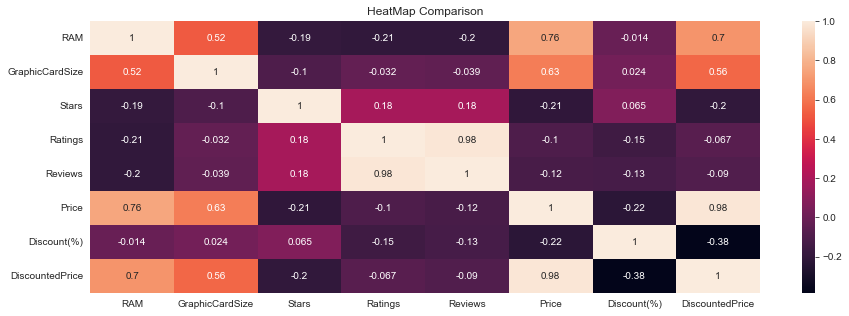

In [38]:
# sbn.set_style("whitegrid")
plt.figure(figsize=(15,5))
sbn.heatmap(flipkart.corr(),annot=True) #center = 1
plt.title("HeatMap Comparison")
plt.show()

##### Above Heatmaps tell us that Price is Dependent on RAM followed by Graphic card size. Discount Price is highly dependent on Original Price. We can say that more the RAM and Graphic card size more is the Price (and discount price is calculated from original price itself So definately its related and obvious). Similarly Ratings and Reviews are very much related because more the number of customers will buy the product, more the number of ratings it will have and more the tendency to have reviews to that product.

##### But if RAM affects Price then so does, storage space too. Just To relate Lets Convert The Storage Of SSD/HDD into GB.

In [39]:
flipkart["SSD_GB"]=flipkart["SSD"].apply(lambda x:" ".join(re.split("\s(?:TB|GB)",x)))
flipkart["HDD_GB"]=flipkart["HDD"].apply(lambda x:" ".join(re.split("\s(?:TB|GB)",x)))
flipkart["SSD_GB"]=flipkart["SSD_GB"].astype("float")
flipkart["HDD_GB"]=flipkart["HDD_GB"].astype("float")

In [40]:
flipkart["SSD_GB"] = flipkart["SSD_GB"].apply(lambda x:x*1024 if x<128 else x)
flipkart["HDD_GB"] = flipkart["HDD_GB"].apply(lambda x:x*1024 if x<128 else x)

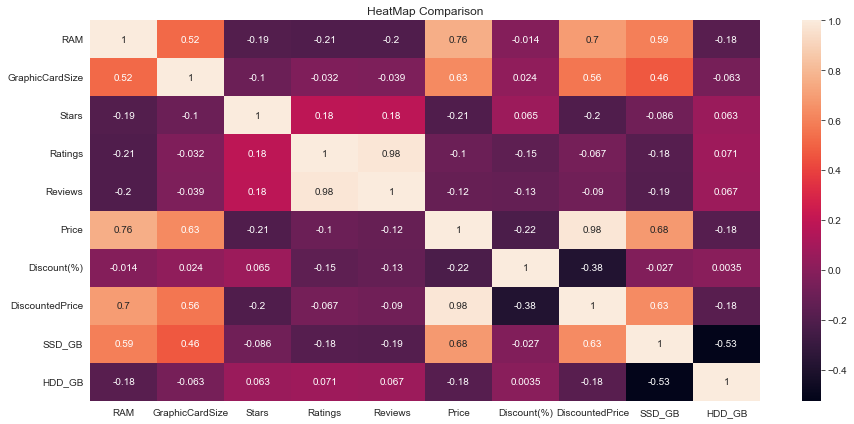

In [42]:
plt.figure(figsize=(15,7))
sbn.heatmap(flipkart.corr(),annot=True)
plt.title("HeatMap Comparison")
plt.show()

#### As We See, After Converting The HDD and SDD to GB,We Infer That Storage Too Does Impact On Price,But Here SSD Plays Role Rather Than HDD. So it May be That SSD weights more than HDD as SSD implemention in laptops is not easy and it take Efforts, so It Definately Needs To Be Paid OFF and that's Why Price is impacted.

#### Now We Understand That RAM,SSD_GB impacts the Price,So lets See the relation Via Scatter Plot and See what does it Say

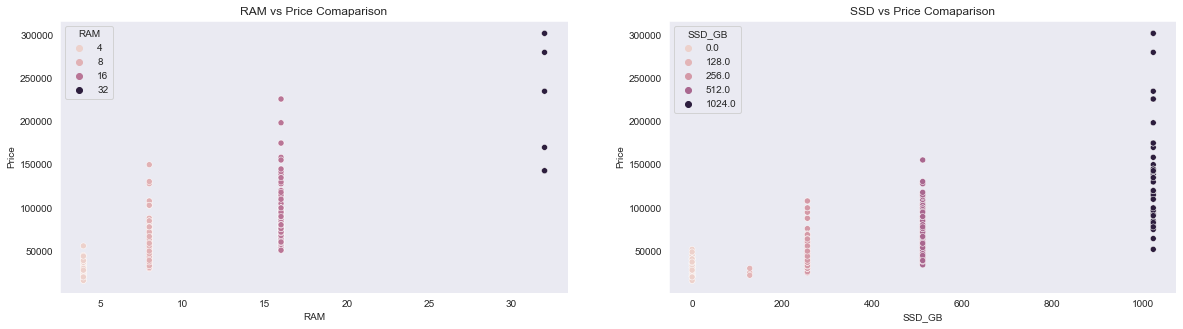

In [45]:
plt.figure(figsize = (20,5))
plt.subplot(121)
sbn.scatterplot(x="RAM",y="Price",hue="RAM",data = flipkart)
plt.title("RAM vs Price Comaparison")
plt.subplot(122)
sbn.scatterplot(x="SSD_GB",y="Price",hue="SSD_GB",data=flipkart)
plt.title("SSD vs Price Comaparison")
plt.show()

##### Now As Per Above Scatter Plots, we Can Say That More the RAM and SSD more the Price may Increase.

#### Lets Check what's the Maximum Discount percentage Given Via Box plot

In [56]:
# flipkart['Discount(%)'].value_counts()

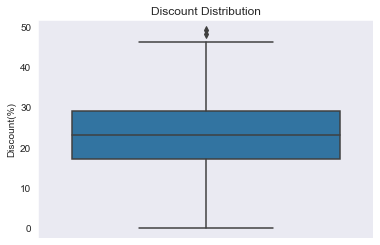

In [46]:
# plt.figure(figsize=(15,5))
sbn.boxplot(y="Discount(%)",data=flipkart)
plt.title("Discount Distribution")
plt.show()

##### From Aboove Graph We Can Say That Most of the Products Displayed the avergae discount is between 16%-34% and most of the products have max discount around 25 %. There are not much product Which exceed 35% discount

#### Lets Check The Original Price and discount Price Distribution of displayed Laptops

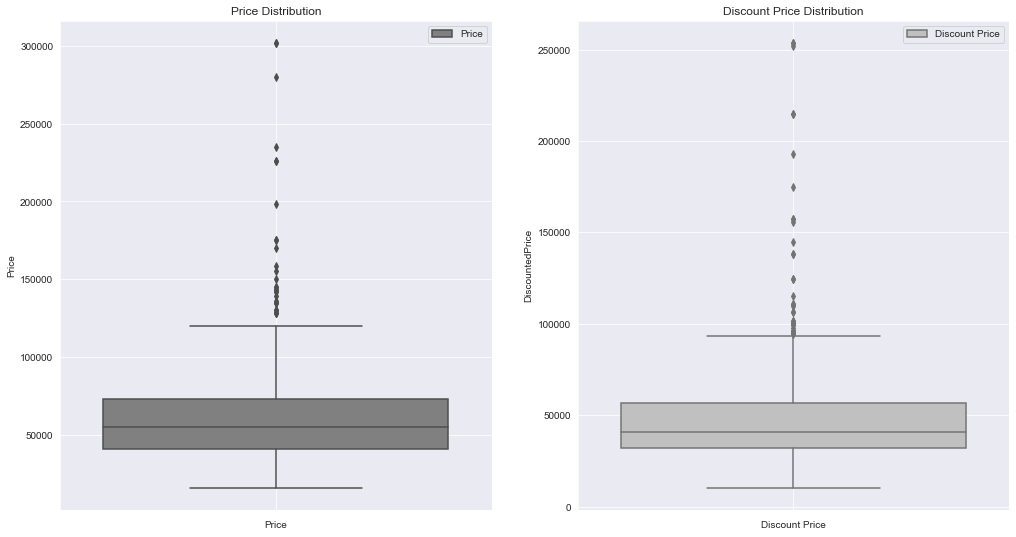

In [60]:
plt.figure(figsize=(17,9))
plt.subplot(121)
sbn.boxplot(y="Price",data=flipkart,color="grey")
plt.xlabel("Price")
plt.title("Price Distribution")
plt.legend(["Price"])
plt.grid()
plt.subplot(122)
sbn.boxplot(y="DiscountedPrice",data=flipkart,color="silver")
plt.xlabel("Discount Price")
plt.title("Discount Price Distribution")
plt.legend(["Discount Price"])
plt.grid()
plt.show()

In [72]:
flipkart[['Price','DiscountedPrice']].describe()
# flipkart.agg({'Price':[np.sum],'DiscountedPrice':[np.sum] })

,Price,DiscountedPrice
count,456.000000,456.000000
mean,63958.199561,50236.180592
std,36740.300621,32518.790539
min,15990.000000,10393.500000
25%,40990.000000,32284.575000
50%,54994.500000,40717.390000
75%,73240.000000,56781.550000
max,301990.000000,253671.600000


#### With Box plot We Can See The Average Price Shift is 21%.

#### This Can Be Also Done Via Histogram or Distplot as they explian the frequency distribution of values But Box plot give Precise distribution info and thus we can Infer How Many values Lie in which Range.

#### For a Add On Lets Check With Histogram and Density plots

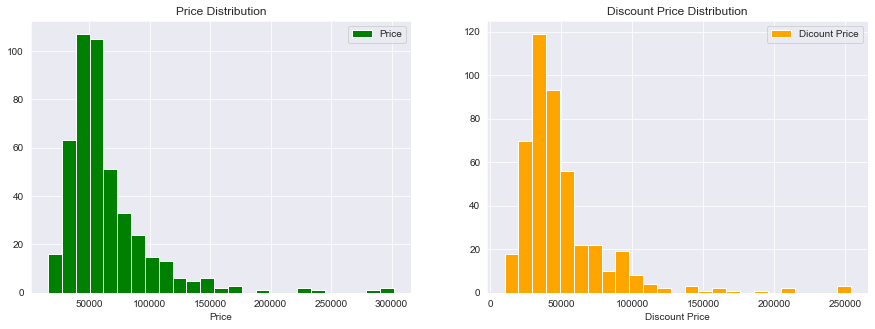

In [75]:
plt.figure(figsize=(15,5))
plt.subplot(121)
flipkart["Price"].hist(bins=25,color="green")
plt.xlabel("Price")
plt.title("Price Distribution")
plt.legend(["Price"])
plt.subplot(122)
flipkart["DiscountedPrice"].hist(bins=25,color="orange")
plt.xlabel("Discount Price")
plt.title("Discount Price Distribution")
plt.legend(["Dicount Price"])
plt.show()

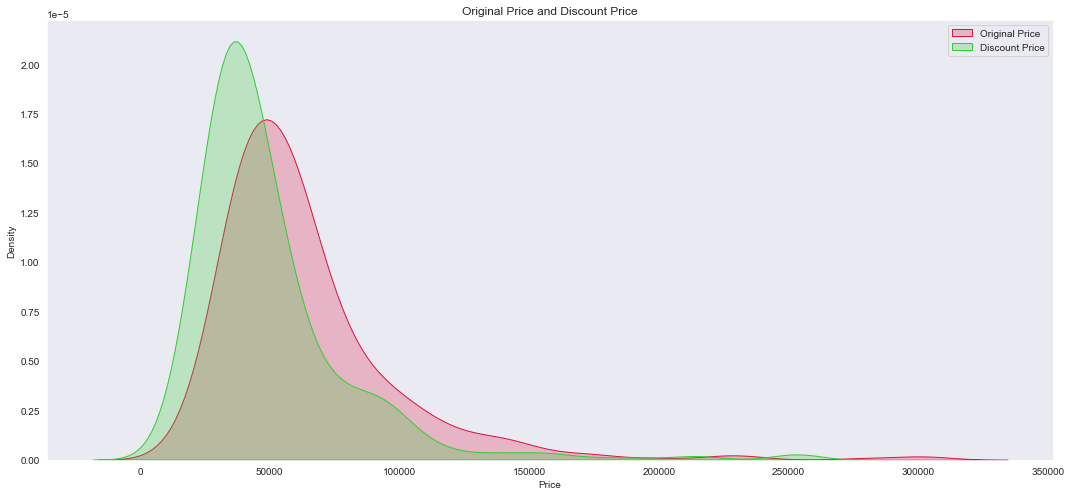

In [84]:
fig, ax = plt.subplots(figsize=(15,7))
sbn.kdeplot(data=flipkart, x="Price" ,
            color='crimson', label='Original Price', fill=True, ax=ax)
sbn.kdeplot(data=flipkart, x="DiscountedPrice",
            color='limegreen', label='Discount Price', fill=True, ax=ax)
ax.legend()
plt.title("Original Price and Discount Price")
plt.tight_layout()
plt.show()

#### Lets Check Which Brand is Displayed On Screen

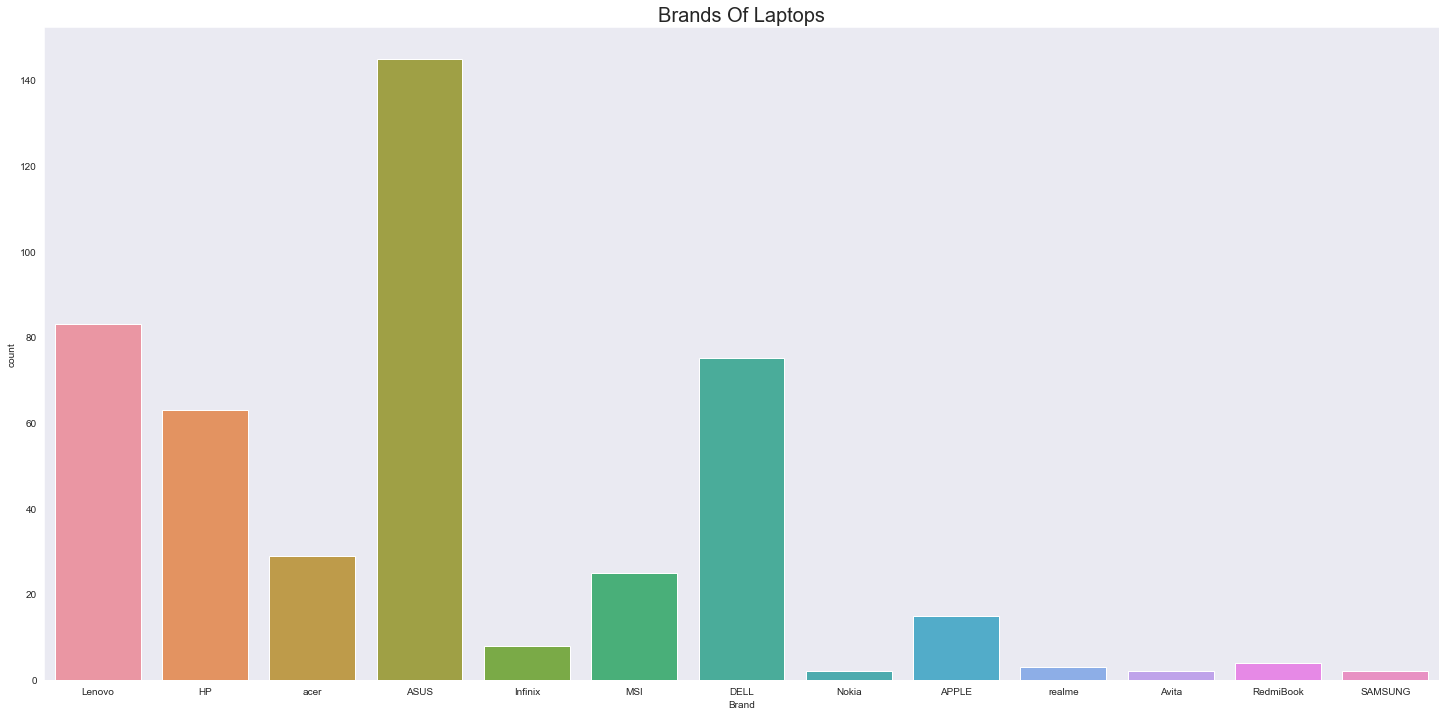

In [87]:
plt.figure(figsize=(25,12))
sbn.countplot(x="Brand",data=flipkart)
plt.title("Brands Of Laptops",fontsize=20)
plt.show()

#### Looking Aboove, It Looks Like Asus, Dell, HP and Lenovo are Top 4 Models Displayed. In Which ASUS Ranks First and is Highly Sold.

#### Lets Check Which Processor Is widely Displayed

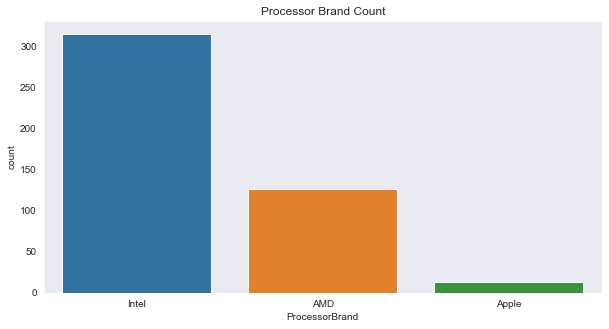

In [88]:
plt.figure(figsize=(10,5))
sbn.countplot(x="ProcessorBrand",data=flipkart)
plt.title("Processor Brand Count")
plt.show()

#### 1. Looking Aboove It Seems That Intel Processors Are displayed mostly with Top Selling Brands i.e Lenovo, Dell, Hp and Asus. Its Quite Obvious that Intel is Oldest and yet Better Processor Which Offers Better Performance with its Multi_Process Scaling so that's why it has max displays.


#### 2. Apple Seems to be Least Sold and Can be said that since Apple Laptops are Not Pocket Friendly (expensive), they Seems to be used by wealthy people.

#### Lets See Which Intel Processor Model is Sold Mostly.

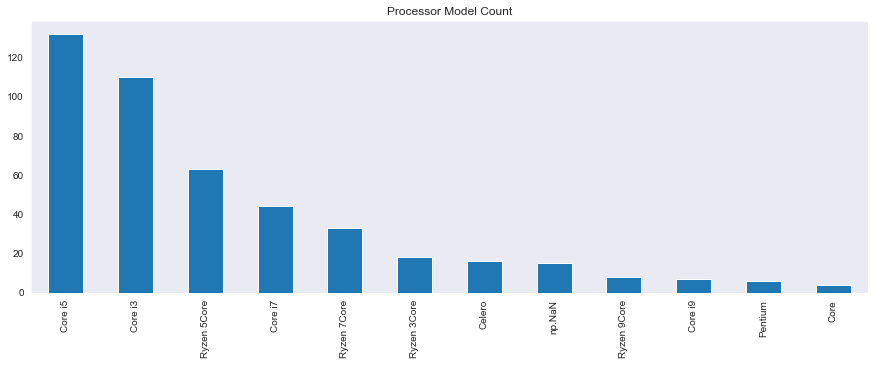

In [89]:
plt.figure(figsize=(15,5))
flipkart["ProcessorName"].value_counts().plot(kind="bar")
plt.title("Processor Model Count")
plt.show()

#### As we can see above, Intel Processors are Displayed more,therfore Models By Intel top the scale and in that model also, Core i5 processors are highest in count followed by Core i3 and Ryzen 5 Core.

#### Lets See Whats the Generation has highest display

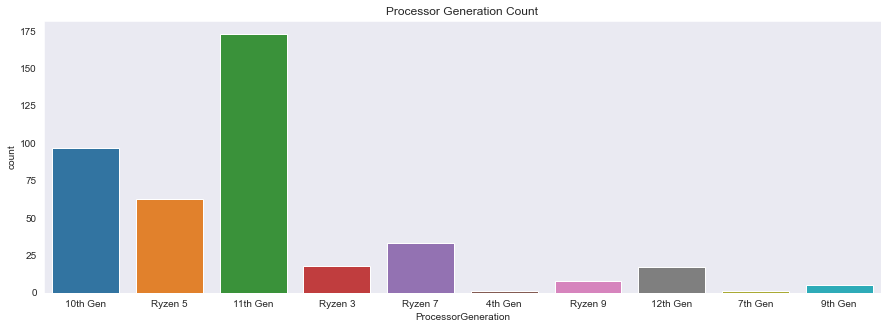

In [90]:
plt.figure(figsize=(15,5))
sbn.countplot(x="ProcessorGeneration",data=flipkart)
plt.title("Processor Generation Count")
plt.show()

####  Mostly intel processors are of 11th and 10th Generations only (which are latest Generations).

#### Lets Check The Max Count Ram Size displayed

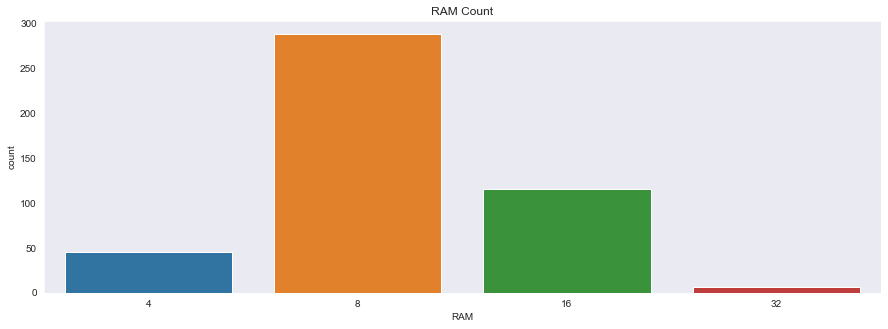

In [92]:
plt.figure(figsize=(15,5))
sbn.countplot(x="RAM",data=flipkart)
plt.title("RAM Count")
plt.show()

#### As we Can See 8 gb RAM is Majorly Displayed. So it Can Be Like Average Buying Pattern of Any One Looking Laptop Use Prefers 8 Gb Ram

#### So we will Consider RAM that is equal to and greater than 8 GB. Would not be better to Take RAM less than that. Remember what's highest, we will assume that and greater than that as consideration for our filter.

#### for example if 16 GB RAM would have highest count then we would have taken RAM >= 16 GB



#### Lets See How Many Products Displayed Offer Grahic Card Description. This Is a Optional Part and Solely depends on Customer.

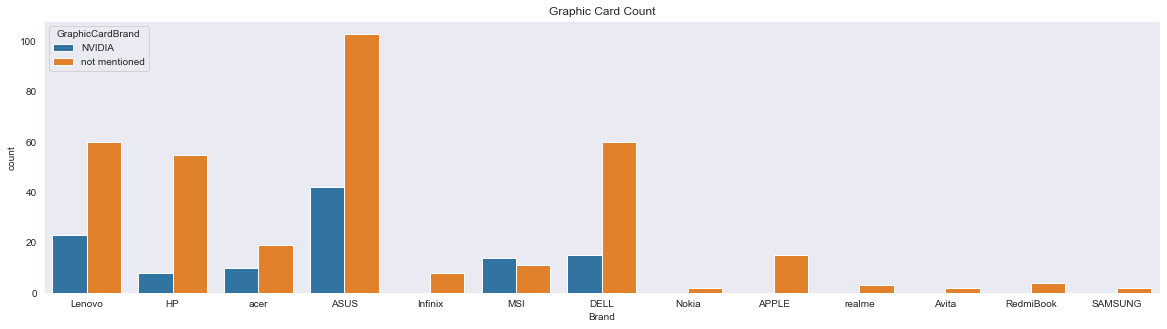

In [94]:
plt.figure(figsize=(20,5))
sbn.countplot(x="Brand",hue="GraphicCardBrand",data=flipkart)
plt.title("Graphic Card Count")
plt.show()

#### So As We see,Most of the Products havent displayed Graphic Card Brand, May be they come up with thier Own, while ASUS Brand has Highest Count For NVIDIA Graphic Card followed by Lenovo. 

#### Lets Check What the Storage Size Displayed

#### Lets Check For SSD Storage

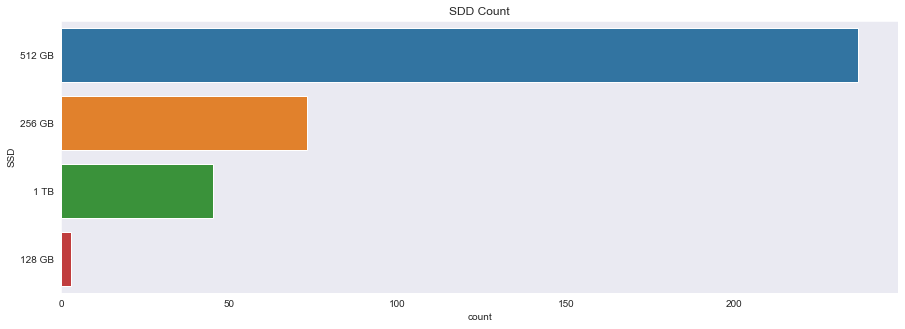

In [95]:
plt.figure(figsize=(15,5))
sbn.countplot(data=flipkart[(flipkart["HDD_GB"]==0) & (flipkart["SSD_GB"]!=0)],y="SSD")
plt.title("SDD Count")
plt.show()

#### Most Of the Laptops having only Having SSD only having Storage Size of 512 GB and the Second Most After that most of the laptops have storage size of 256 GB. And there are SSD's More than 512 also but they are low in count. 

#### So we will consider SSD size >=512 GB as 512 GB is most displayed so 512 and anything more than that will be good unless that particular laptop contains HDD of 1 TB. 

### Note:
#### 512 GB is minimum space everyone should prefer generally as <512 GB won't be sufficient and won't last long. 

#### Similarly lets Plot the Same for HDD.

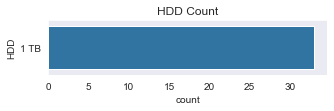

In [98]:
plt.figure(figsize=(5,1))
sbn.countplot(y="HDD",data=flipkart[(flipkart["SSD_GB"]==0) & (flipkart["HDD_GB"]!=0)])
plt.title("HDD Count")
plt.show()

#### So around 35 Laptops Having Only HDD which is having space of 1 Terabyte only. So for HDD we will consider only for 1 TB. 

#### So with this we get idea about what filters to apply as well.

#### Lets See For Laptops having SSD and HDD both.

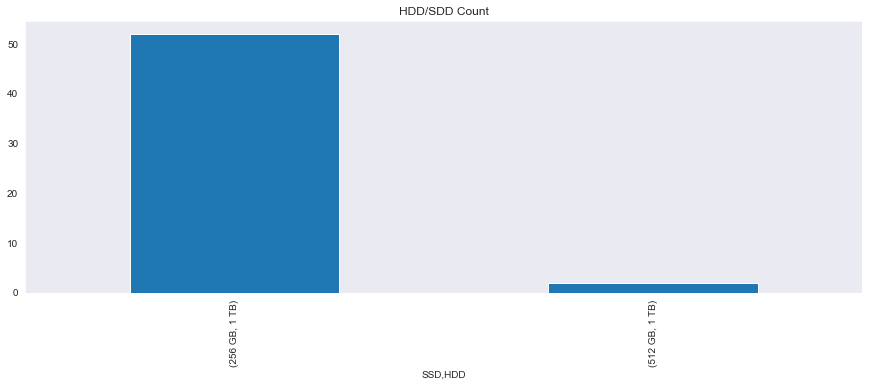

In [99]:
plt.figure(figsize=(15,5))
flipkart[(flipkart["SSD_GB"]!=0) & (flipkart["HDD_GB"]!=0)][["SSD","HDD"]].value_counts().plot(kind="bar")
plt.title("HDD/SDD Count")
plt.show()

#### So Laptops having Both SSD and HDD of 256 GB and 1 TB are More. We would need to take 256 GB SSD as Filter if we are Analysing For Laptops having SSD and HDD.

#### Fortunately that gets covered with 1 TB HDD so our SSD value min will be 256 GB and more. But Still Lets See How Many Brands Lie With Intel i5 11th gen 8 GB RAM 512 GB SSD only. Well This is Just To See and Analyse The Count Difference With Intel i5 11th gen >=512 GB SSD|HDD >=8GB RAM.


#### Based On The Graphs Plotted For Processor Brand,Processor Name and generation,RAM and Storage, We may see that for all these properties and features must be filled by  ASUS Brand as its the most displayed brand on flipkart

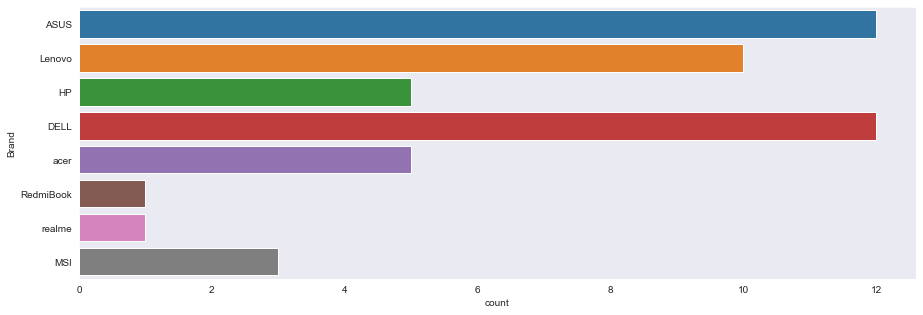

In [101]:
plt.figure(figsize=(15,5))
sbn.countplot(data=flipkart[(flipkart["ProcessorBrand"]=="Intel") & (flipkart["ProcessorName"]=="Core i5") & (flipkart["ProcessorGeneration"]=="11th Gen") & (flipkart["RAM"]==8) & ((flipkart["SSD_GB"]==512) | (flipkart["HDD_GB"]==1024))],y="Brand")
plt.show()

#### Surprisingly both ASUS and DELL brands are filling those criteria in 12 different laptops followed by Lenovo.

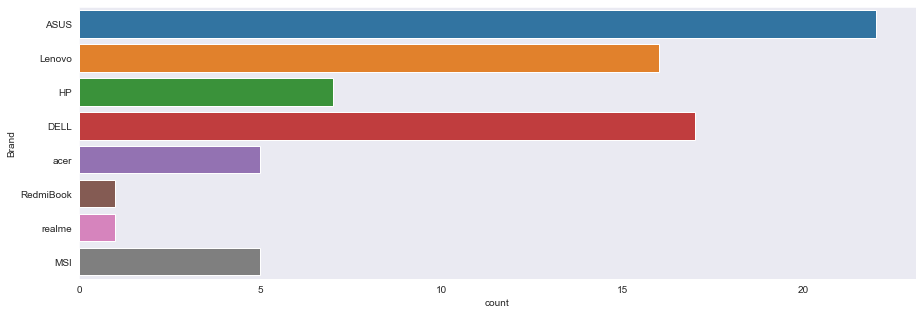

In [102]:
plt.figure(figsize=(15,5))
sbn.countplot(data=flipkart[(flipkart["ProcessorBrand"]=="Intel") & (flipkart["ProcessorName"]=="Core i5") & (flipkart["ProcessorGeneration"]=="11th Gen") & (flipkart["RAM"]>=8) & ((flipkart["SSD_GB"]>=512) | (flipkart["HDD_GB"]>=1024))],y="Brand")
plt.show()

#### Comparing The Plots above we see,
#### ASUS satisfying our criteria ( intel- i5- 11th Gen- RAM>8- SSD|HDD >512 GB) most number of times.
#### Apple May Have Models Which includes RAM>8 or SSD|HDD >512 GB
#### Dell(17), MSI(5), acer(5) and HP(7) no. of Laptops falling In This Configuration while others have one which includes RedmiBook, realme seems new laptop brands.
#### This Comparison was just to get the General idea of which brand may have only 8GB RAM and >8GB RAM, Storage only 512 GB SSD and >512 GB SSD|HDD. 
#### Lets Check Which Models for this top 3 Brands Are.

In [108]:
Top_3_i5_11th_Gen=flipkart[((flipkart["Brand"]=="ASUS")|(flipkart["Brand"]=="DELL")|(flipkart["Brand"]=="Lenovo")|(flipkart["Brand"]=="APPLE")) & (flipkart["ProcessorBrand"]=="Intel") & (flipkart["ProcessorName"]=="Core i5") & (flipkart["ProcessorGeneration"]=="11th Gen") & ((flipkart["SSD_GB"]>=512)|(flipkart["HDD_GB"]>=512))]
Top_3_i5_11th_Gen

,Brand,ModelName,ProcessorBrand,ProcessorName,ProcessorGeneration,OS,RAM,HDD,SSD,StorageDrive,GraphicCardBrand,GraphicCardSize,Stars,Ratings,Reviews,Price,Discount(%),DiscountedPrice,SSD_GB,HDD_GB
22,ASUS,ASUS VivoBook 14 (2022) Core i5 11th Gen - (8 ...,Intel,Core i5,11th Gen,Windows 11,8,1 TB,256 GB,1 TB HDD 256 GB SSD,not mentioned,0.0,4.2,119.0,9.0,49990,31.0,34493.10,256.0,1024.0
25,Lenovo,Lenovo Ideapad Slim 5i Core i5 11th Gen - (16 ...,Intel,Core i5,11th Gen,Windows 10,16,0,512 GB,512 GB SSD,not mentioned,0.0,4.4,956.0,108.0,61990,38.0,38433.80,512.0,0.0
30,ASUS,ASUS VivoBook 15 (2022) Core i5 11th Gen - (8 ...,Intel,Core i5,11th Gen,Windows 10,8,1 TB,256 GB,1 TB HDD 256 GB SSD,not mentioned,0.0,4.3,1421.0,146.0,50990,28.0,36712.80,256.0,1024.0
48,ASUS,ASUS VivoBook Ultra 14 (2022) Core i5 11th Gen...,Intel,Core i5,11th Gen,Windows 11,16,0,512 GB,512 GB SSD,not mentioned,0.0,4.6,43.0,5.0,55990,30.0,39193.00,512.0,0.0
59,Lenovo,Lenovo IdeaPad 3 Core i5 11th Gen - (8 GB/512 ...,Intel,Core i5,11th Gen,Windows 10,8,0,512 GB,512 GB SSD,not mentioned,0.0,4.3,115.0,6.0,51990,41.0,30674.10,512.0,0.0
62,ASUS,ASUS VivoBook Ultra 14 (2021) Core i5 11th Gen...,Intel,Core i5,11th Gen,Windows 11,16,0,512 GB,512 GB SSD,not mentioned,0.0,4.6,43.0,5.0,55990,30.0,39193.00,512.0,0.0
63,Lenovo,Lenovo Ideapad Slim 3i (2021) Core i5 11th Gen...,Intel,Core i5,11th Gen,Windows 10,8,0,512 GB,512 GB SSD,not mentioned,0.0,4.3,389.0,36.0,50990,31.0,35183.10,512.0,0.0
71,DELL,DELL Vostro Core i5 11th Gen - (8 GB/1 TB HDD/...,Intel,Core i5,11th Gen,Windows 10,8,1 TB,256 GB,1 TB HDD 256 GB SSD,not mentioned,0.0,3.8,378.0,29.0,49990,37.0,31493.70,256.0,1024.0
87,ASUS,ASUS ASUS TUF Dash F15 Core i5 11th Gen - (16 ...,Intel,Core i5,11th Gen,Windows 11,16,0,512 GB,512 GB SSD,NVIDIA,6.0,4.9,8.0,0.0,84990,34.0,56093.40,512.0,0.0
94,ASUS,ASUS VivoBook Ultra 14 (2021) Core i5 11th Gen...,Intel,Core i5,11th Gen,Windows 11,16,0,512 GB,512 GB SSD,not mentioned,0.0,4.6,43.0,5.0,55990,30.0,39193.00,512.0,0.0


In [126]:
Top_3_i5_11th_Gen.shape

(56, 20)

#### As per Above Table, For 3 Brands there are Total 56 Models But Lets See How Many Model Each  Brands Has which falls Under This Configuration

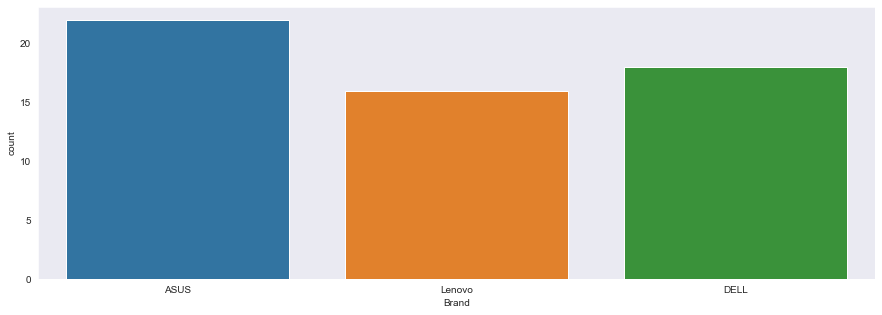

In [109]:
plt.figure(figsize=(15,5))
sbn.countplot(x="Brand",data=Top_3_i5_11th_Gen)
plt.show()

#### We can see 3 brands (ASUS, LENOVO, DELL) almost have equal contribution.
#### So lets See which Brand has What RAM, Storage size, SSD and HDD.

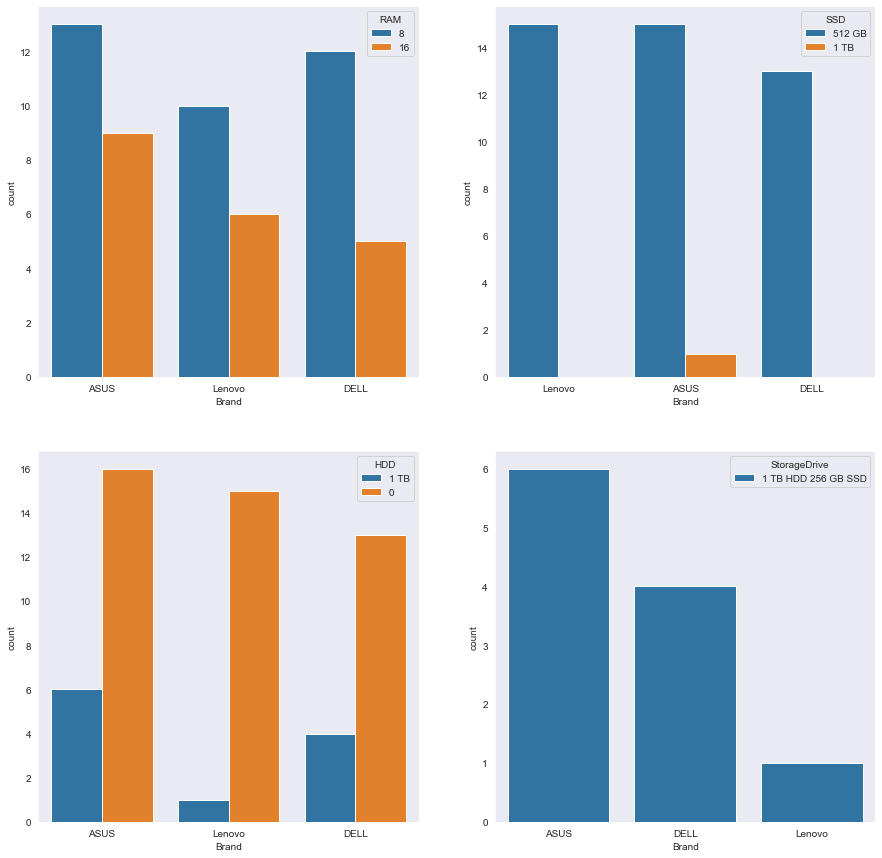

In [116]:
plt.figure(figsize=(15,15))
plt.subplot(221)
sbn.countplot(x="Brand",data=Top_3_i5_11th_Gen[Top_3_i5_11th_Gen["RAM"]>=8],hue="RAM")
plt.subplot(222)
sbn.countplot(x="Brand",data=Top_3_i5_11th_Gen[Top_3_i5_11th_Gen["HDD_GB"]==0],hue="SSD")
plt.subplot(223)
sbn.countplot(x="Brand",data=Top_3_i5_11th_Gen[Top_3_i5_11th_Gen["SSD_GB"]!=0],hue="HDD")
plt.subplot(224)
sbn.countplot(x="Brand",data=Top_3_i5_11th_Gen[(Top_3_i5_11th_Gen["SSD_GB"]!=0) & (Top_3_i5_11th_Gen["HDD_GB"]!=0)],hue="StorageDrive")
plt.show()

#### From Above We Understand That DELL and ASUS has almost equal No. of Models having 8 GB RAM.

#### Dell, Lenovo and ASUS all have almost equal number of models who Have SSD only of 512 GB. For any SSD (without any HDD) ASUS has more counts compared to other two models considering top 3 brands.

#### Looking Over storage drive it Looks Like Lenovo doesn't offer much of 1 HDD + 256 SSD as compared to ASUS and Dell.

#### From This We Can Say ASUS prefers More Focus on SSD (along with HDD as well) following Dell.

#### If you prefer Models with 1TB SSD without HDD then ASUS might be an option.
#### If You Prefer Models with >8 GB RAM then also ASUS might be you option and Lenovo could be as well.
#### ASUS (followed by DELL) might be you option if you prefer RAM of 8 GB and 1 HDD or 1 HDD + SSD(any size) [since your prefernace is HDD].

#### So We Analysed The Configurations of 3 Models and Just Overall guessed what our Options Might be If we are Looking Over laptops With 11th Gen i5 8 GB or More RAM and 512 GB or More SSD|HDD.
#### But We definately may or may not have budget and can't interpret whom to choose. 
#### But let's say we have a budget of atmost range of 70K. So Let's See The Original Price Distribution.
#### Mostly Everone is More Excited about Discounted Price But some do prefer Original Price if its Under Budget.

#### Lets See the Original Vs Discounted Price Distribution Of These 3 Models via Histogram,Box and Violin Plot.

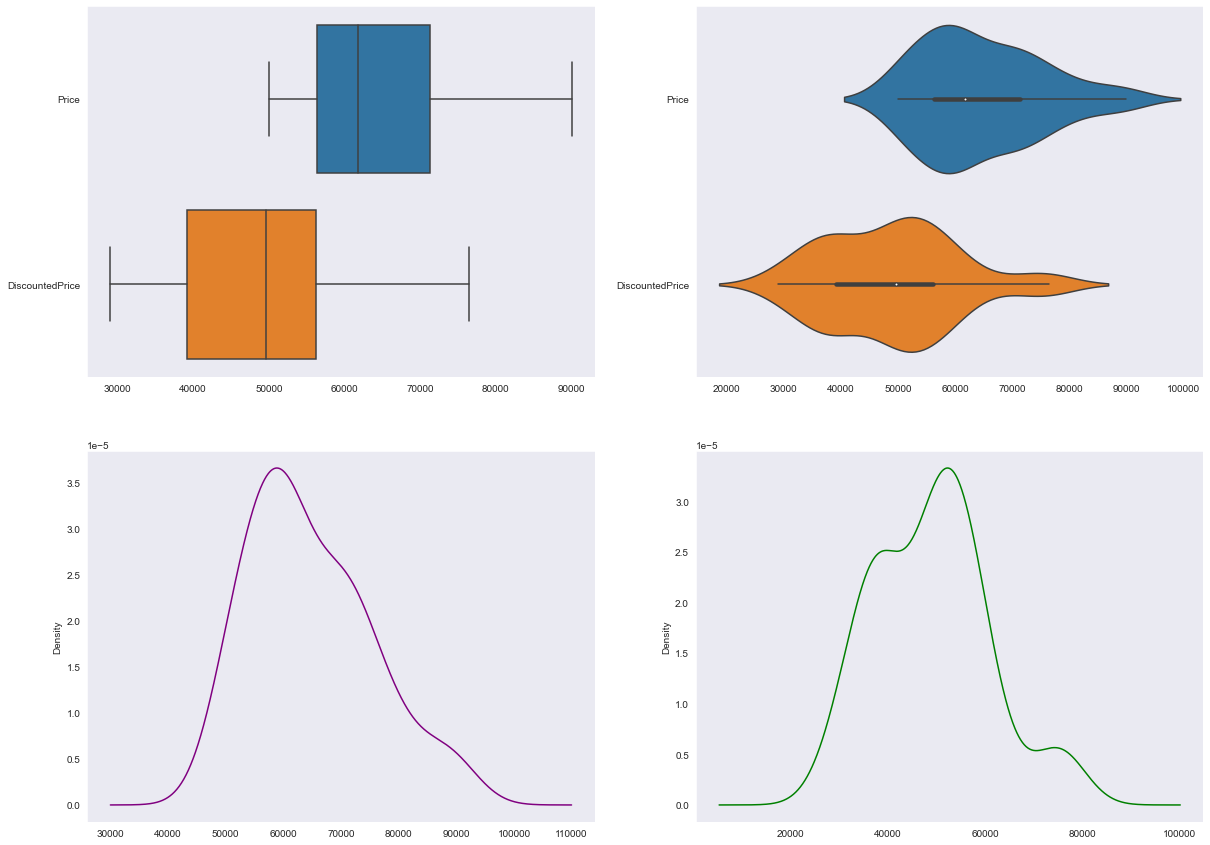

In [127]:
plt.figure(figsize=(20,15))
plt.subplot(221)
sbn.boxplot(data=Top_3_i5_11th_Gen[["Price","DiscountedPrice"]],orient="h")
plt.subplot(222)
sbn.violinplot(data=Top_3_i5_11th_Gen[["Price","DiscountedPrice"]],orient="h")
Top_3_i5_11th_Gen["Price"].plot(kind="kde",ax=plt.subplot(223),color="purple")
Top_3_i5_11th_Gen["DiscountedPrice"].plot(kind="kde",ax=plt.subplot(224),color="green")
plt.show()

#### From Above we Understand that Before Discount Most of The values Were Under our Budget 70 K, Post Discount prices came in Range of 40K to 56 K from 56 K to 75s K. So After Discount the Overall Difference in Price Range Was 15 K approximately.


#### From Histogram also we Interpret that Before discount the Most prices were in range of 55K to 80 K. But Histogram is pretty scarsed to read so Box plot gives us precise info. In Box Plot We See Some Outliers Too But the reason for that is We have Apple laptops also so they begin from 100 K min so it might have affected the price range.

#### Violin Plot is also similar like box but it gives idea of where most data is and also average price. So we see most of the data lies towards Min side before and after the Discount and at the Tail side it is skewed because we have outliers


#### Now Lets Check How Many Model Lie Under our Budget. Lets Say our Budget is 70K.

In [122]:
UB_i5_11th=Top_3_i5_10th_Gen[Top_3_i5_10th_Gen["DiscountedPrice"]<70000]
UB_i5_11th.shape

(52, 20)

In [124]:
UB_i5_11th

,Brand,ModelName,ProcessorBrand,ProcessorName,ProcessorGeneration,OS,RAM,HDD,SSD,StorageDrive,GraphicCardBrand,GraphicCardSize,Stars,Ratings,Reviews,Price,Discount(%),DiscountedPrice,SSD_GB,HDD_GB
22,ASUS,ASUS VivoBook 14 (2022) Core i5 11th Gen - (8 ...,Intel,Core i5,11th Gen,Windows 11,8,1 TB,256 GB,1 TB HDD 256 GB SSD,not mentioned,0.0,4.2,119.0,9.0,49990,31.0,34493.10,256.0,1024.0
25,Lenovo,Lenovo Ideapad Slim 5i Core i5 11th Gen - (16 ...,Intel,Core i5,11th Gen,Windows 10,16,0,512 GB,512 GB SSD,not mentioned,0.0,4.4,956.0,108.0,61990,38.0,38433.80,512.0,0.0
30,ASUS,ASUS VivoBook 15 (2022) Core i5 11th Gen - (8 ...,Intel,Core i5,11th Gen,Windows 10,8,1 TB,256 GB,1 TB HDD 256 GB SSD,not mentioned,0.0,4.3,1421.0,146.0,50990,28.0,36712.80,256.0,1024.0
48,ASUS,ASUS VivoBook Ultra 14 (2022) Core i5 11th Gen...,Intel,Core i5,11th Gen,Windows 11,16,0,512 GB,512 GB SSD,not mentioned,0.0,4.6,43.0,5.0,55990,30.0,39193.00,512.0,0.0
59,Lenovo,Lenovo IdeaPad 3 Core i5 11th Gen - (8 GB/512 ...,Intel,Core i5,11th Gen,Windows 10,8,0,512 GB,512 GB SSD,not mentioned,0.0,4.3,115.0,6.0,51990,41.0,30674.10,512.0,0.0
62,ASUS,ASUS VivoBook Ultra 14 (2021) Core i5 11th Gen...,Intel,Core i5,11th Gen,Windows 11,16,0,512 GB,512 GB SSD,not mentioned,0.0,4.6,43.0,5.0,55990,30.0,39193.00,512.0,0.0
63,Lenovo,Lenovo Ideapad Slim 3i (2021) Core i5 11th Gen...,Intel,Core i5,11th Gen,Windows 10,8,0,512 GB,512 GB SSD,not mentioned,0.0,4.3,389.0,36.0,50990,31.0,35183.10,512.0,0.0
71,DELL,DELL Vostro Core i5 11th Gen - (8 GB/1 TB HDD/...,Intel,Core i5,11th Gen,Windows 10,8,1 TB,256 GB,1 TB HDD 256 GB SSD,not mentioned,0.0,3.8,378.0,29.0,49990,37.0,31493.70,256.0,1024.0
87,ASUS,ASUS ASUS TUF Dash F15 Core i5 11th Gen - (16 ...,Intel,Core i5,11th Gen,Windows 11,16,0,512 GB,512 GB SSD,NVIDIA,6.0,4.9,8.0,0.0,84990,34.0,56093.40,512.0,0.0
94,ASUS,ASUS VivoBook Ultra 14 (2021) Core i5 11th Gen...,Intel,Core i5,11th Gen,Windows 11,16,0,512 GB,512 GB SSD,not mentioned,0.0,4.6,43.0,5.0,55990,30.0,39193.00,512.0,0.0


#### After Applying the Budget Filter We See that we lost Some items. So 4 Models Were Out Of Budget.
#### Lets Check

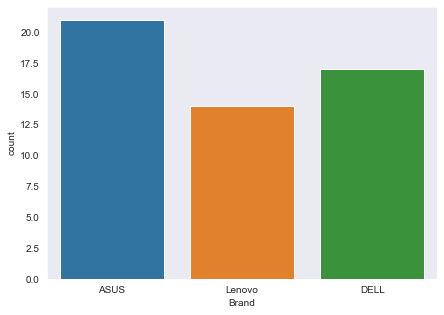

In [128]:
plt.figure(figsize=(7,5))
sbn.countplot(data=UB_i5_11th,x="Brand")
plt.show()

#### So we Lost model form all the brands.

#### Now The Outliers (according to our budget) in Box Must Be Gone.

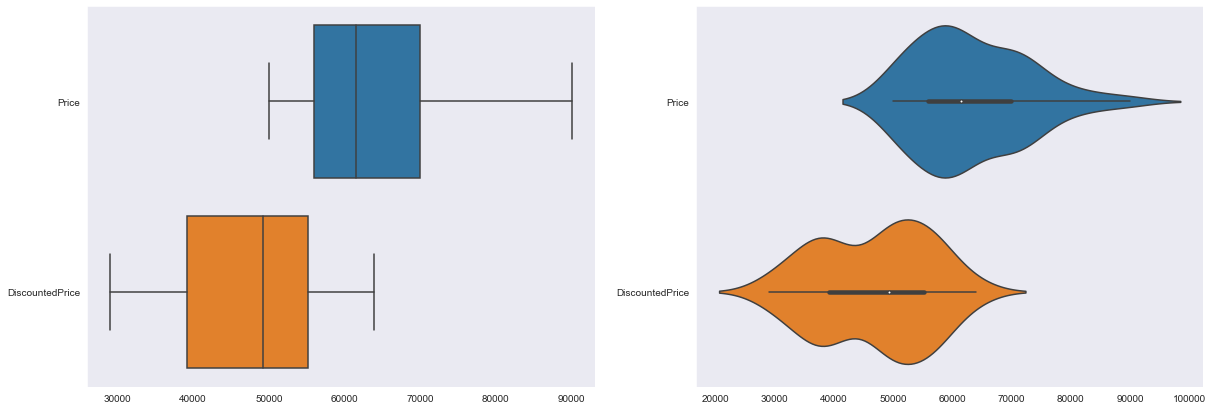

In [131]:
plt.figure(figsize=(20,7))
plt.subplot(121)
sbn.boxplot(data=UB_i5_11th[["Price","DiscountedPrice"]],orient="h")
plt.subplot(122)
sbn.violinplot(data=UB_i5_11th[["Price","DiscountedPrice"]],orient="h")
plt.show()

#### This is the Price Distribution. So now we can see that After Discount the range lies between 38K-56K from 55K-72K, so Difference of  17K between two Brands. So All laptops are Under Budget Post Discount.

#### This Distribution Was For 3 Brands Combined which Gave Idea that Whats the Range of all 3 brand models. But Now Lets Check The Average Price Distribution by Individual Brand using Pie chart.

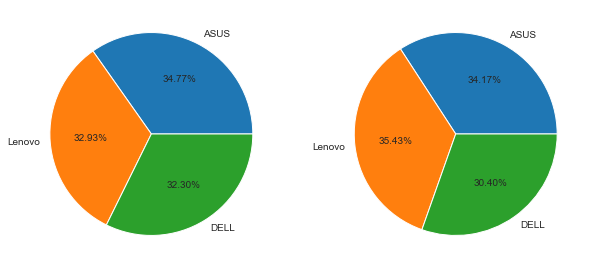

In [177]:
plt.figure(figsize=(10,5))
plt.subplot(121)
# plt.figure(figsize=(5,5))
plt.pie(UB_i5_11th.groupby(["Brand"])["Price"].mean(),autopct="%.2f%%",labels=UB_i5_11th["Brand"].unique())
# plt.show()
plt.subplot(122)
# plt.figure(figsize=(5,5))
plt.pie(UB_i5_11th.groupby(["Brand"])["DiscountedPrice"].mean(),autopct="%.2f%%",labels=UB_i5_11th["Brand"].unique())
plt.show()

#### First One Is for average Original Price and Second One is average Discounted Price. Looking Over We Can See that Lenovo is highest in average Price After the Discount Compared To ASUS, and Dell is lower in both original as well as discounted average price as compared to other brands.

#### Now we saw the Price Distribution. Let's see which models are there.This time we will plot Discounted Prices only as our focus is on Discounted Prices

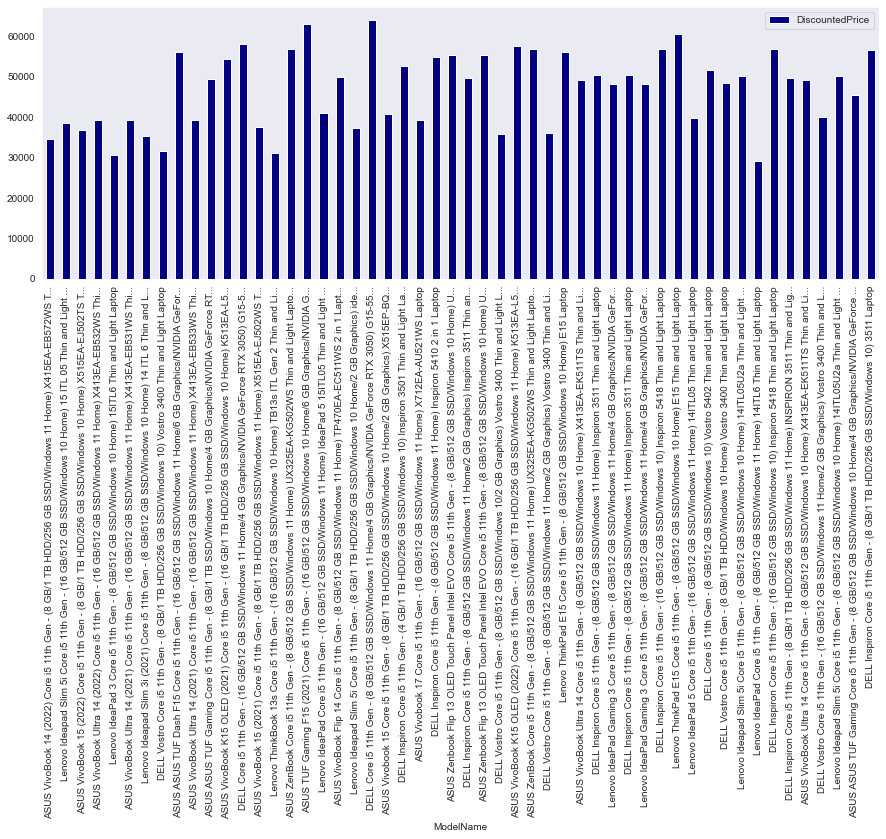

In [150]:
UB_i5_11th_md = UB_i5_11th.plot(kind="bar",x="ModelName",y="DiscountedPrice",figsize=(15,5),color="navy")
# UB_i5_11th_md.set_xticklabels(UB_i5_11th['ModelName'].apply(lambda x: x[:15]), rotation = 60)
UB_i5_11th_md
plt.show()

#### Lets Check Both Brands Individually to get better idea

[]

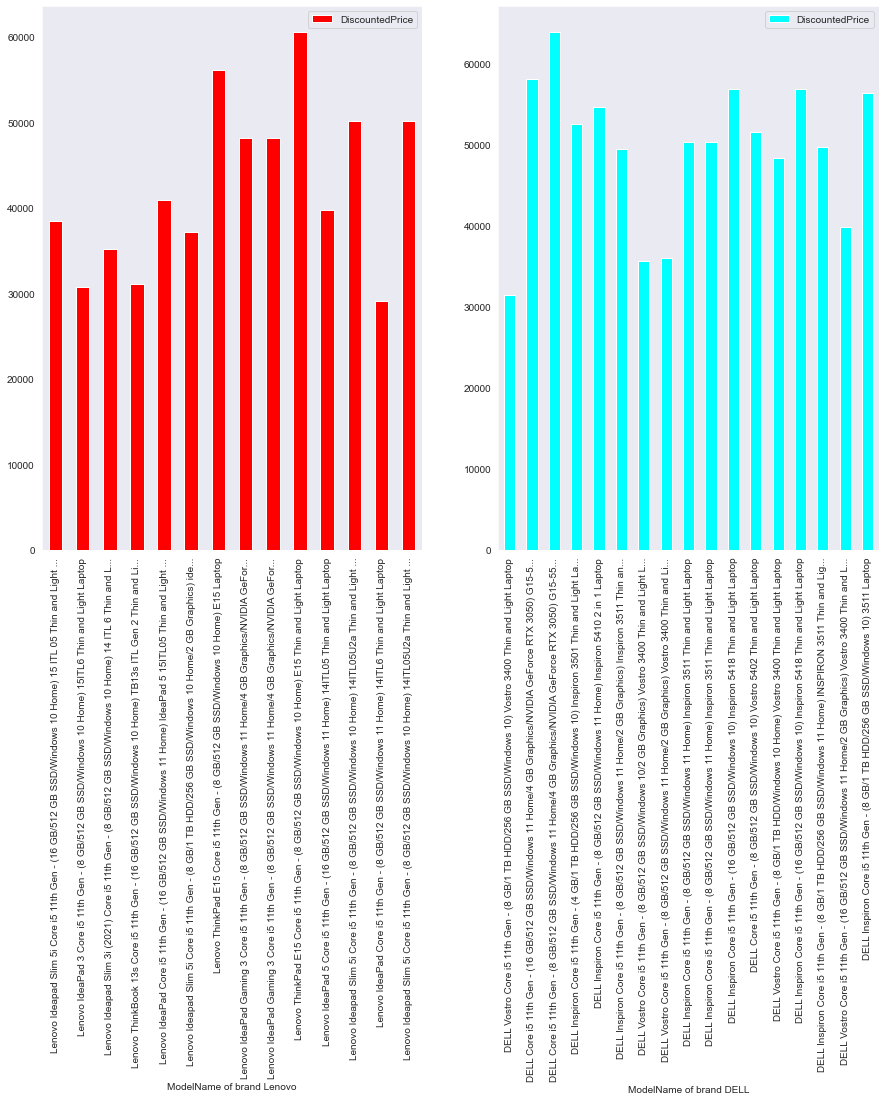

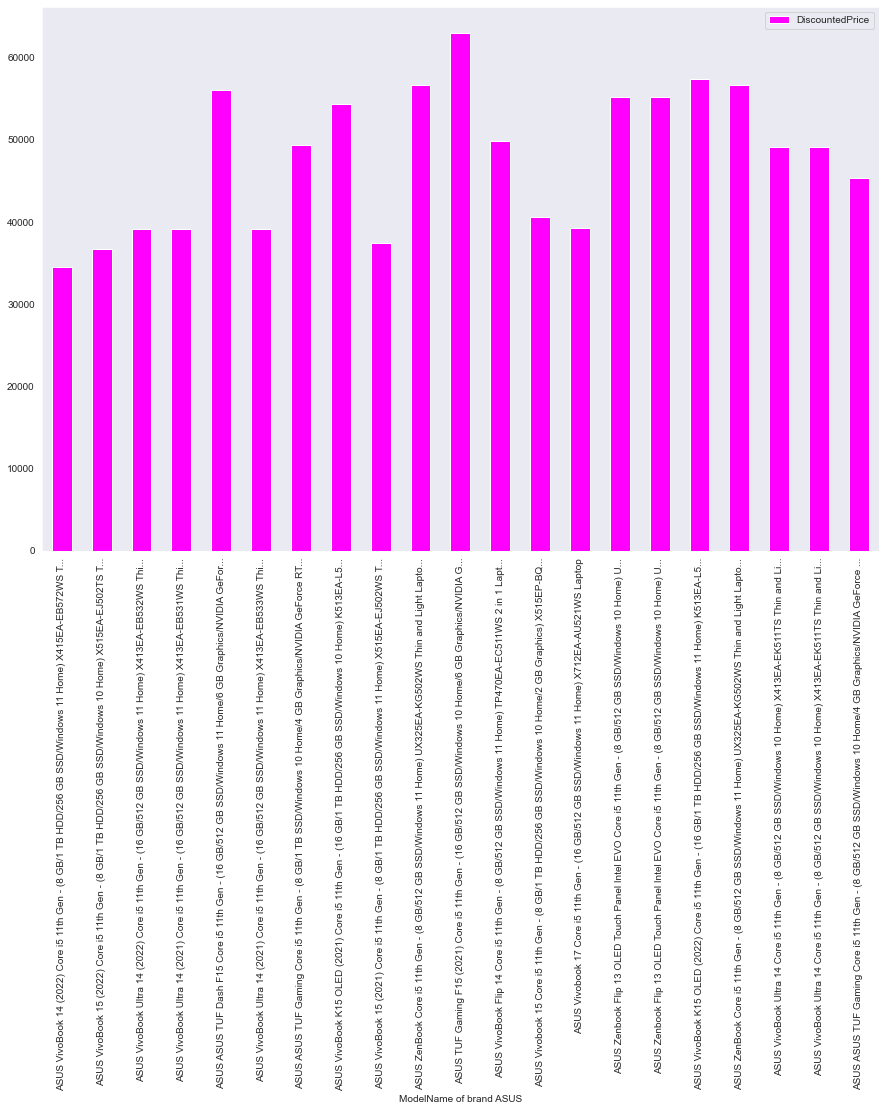

In [155]:
UB_i5_11th[UB_i5_11th["Brand"]=="Lenovo"].plot(kind="bar",x = 'ModelName', xlabel ="ModelName of brand Lenovo",y="DiscountedPrice",figsize=(15,10),color="red",ax=plt.subplot(121))
UB_i5_11th[UB_i5_11th["Brand"]=="DELL"].plot(kind="bar",x = 'ModelName', xlabel ="ModelName of brand DELL",y="DiscountedPrice",figsize=(15,10),color="cyan",ax=plt.subplot(122))
UB_i5_11th[UB_i5_11th["Brand"]=="ASUS"].plot(kind="bar",x = 'ModelName', xlabel ="ModelName of brand ASUS",y="DiscountedPrice",figsize=(15,10),color="magenta")
plt.plot()

#### Now We Got The Top Brands Which are Majorly displayed on flipkart which are affordable. But Stars also matter. So let's select Laptops which have Stars aboove 4. Those are the laptops Which Suit This Recommendation for assumed Configurations.

## Note: This Table List could also be obtained by one simple command, But our Intent was to get Information from the products displayed, so that's why took Price filter and Stars filter seperately.
##### flipkart[((flipkart["Brand"]=="ASUS")|(flipkart["Brand"]=="Lenovo")|(flipkart["Brand"]=="DELL")) & (flipkart["ProcessorBrand"]=="Intel") & (flipkart["ProcessorName"]=="Core i5") & (flipkart["ProcessorGeneration"]=="11th Gen") & ((flipkart["SSD_GB"]>=512)|(flipkart["HDD_GB"]>=512)) & (flipkart["DiscountedPrice"]<70000) & (flipkart["Stars"]>=4)][["ModelName","Brand","DiscountedPrice","Stars","Ratings"]]

In [209]:
stars_i5_11th = UB_i5_11th[UB_i5_11th["Stars"]>= 4]
stars_i5_11th[["ModelName","Brand","DiscountedPrice","Stars", "Ratings"]]
# stars_i5_11th.shape

,ModelName,Brand,DiscountedPrice,Stars,Ratings
22,ASUS VivoBook 14 (2022) Core i5 11th Gen - (8 ...,ASUS,34493.10,4.2,119.0
25,Lenovo Ideapad Slim 5i Core i5 11th Gen - (16 ...,Lenovo,38433.80,4.4,956.0
30,ASUS VivoBook 15 (2022) Core i5 11th Gen - (8 ...,ASUS,36712.80,4.3,1421.0
48,ASUS VivoBook Ultra 14 (2022) Core i5 11th Gen...,ASUS,39193.00,4.6,43.0
59,Lenovo IdeaPad 3 Core i5 11th Gen - (8 GB/512 ...,Lenovo,30674.10,4.3,115.0
62,ASUS VivoBook Ultra 14 (2021) Core i5 11th Gen...,ASUS,39193.00,4.6,43.0
63,Lenovo Ideapad Slim 3i (2021) Core i5 11th Gen...,Lenovo,35183.10,4.3,389.0
87,ASUS ASUS TUF Dash F15 Core i5 11th Gen - (16 ...,ASUS,56093.40,4.9,8.0
94,ASUS VivoBook Ultra 14 (2021) Core i5 11th Gen...,ASUS,39193.00,4.6,43.0
101,ASUS ASUS TUF Gaming Core i5 11th Gen - (8 GB/...,ASUS,49393.50,4.5,439.0


#### Lets See Average rating per Brand. This will gives a direction a bit which Brand is Better

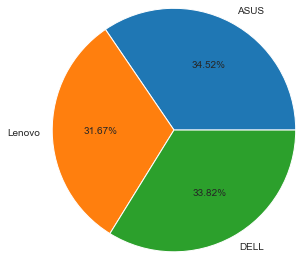

In [210]:
# plt.figure(figsize=(5,5))
plt.subplot(121)
plt.pie(stars_i5_11th.groupby(["Brand"])["Stars"].mean(),autopct="%.2f%%",radius=2,labels=UB_i5_11th["Brand"].unique())
plt.show()

In [183]:
# plt.subplot(121)
# plt.pie(stars_i5_11th.groupby(["Brand"])["Stars"].sum(),autopct="%.2f%%",radius=2,labels=UB_i5_11th["Brand"].unique())
# plt.show()

#### Looks Like ASUS is 3 percent more rated than Lenovo and 0.7 % more rated than DELL. Most Of the Lenovo Brands are below 50 K which is Affordable but doesn't rule than ASUS is to be not looked as the difference is not much but the chart says that ASUS is Bit Popular than Lenovo and DELL as well as ASUS having same popularity but less number of Dell laptops as compared to ASUS Laptops.

#### But Depending on your Mode of work, Lenovo may be better than ASUS/ DELL or vice versa. So it's better to compare and look all. You Can Give priority To ASUS as its bit popular but looking over Lenovo will also help more.

### Recommended for Regular Mode Of Work (Like Shop Bill management etc, Students(College projects, programming, Presentation, MS and etc))

##### For thst SSD is Enough and *SSD is more powerful and faster than HDD* as HDD may slowdown in peformance over time (Unless You Have HDD and SSD both). HDD suits for people having High Professional Work Like Gamers and Jobs which need more storage. And 512 GB is enough if you have something that's for Personal Storage then SSD is sufficent and min of 512 GB is needed, You Don't need Graphic Card but it's advised to have it for safe side. If you have any work that includes animation then you should go with Gaming laptops type(which we'll study later). If you have Low level of graphics work and you don't do graphical work frequently then 2GB GC is enough.

###### Note: For gaming and game development this is not a Good configuration, we'll do this (gaming laptops) analysis later. 

In [211]:
stars_i5_11th[["Brand","ModelName","DiscountedPrice","GraphicCardSize","GraphicCardBrand","Stars",'Ratings',"StorageDrive"]].sort_values(["DiscountedPrice"])

,Brand,ModelName,DiscountedPrice,GraphicCardSize,GraphicCardBrand,Stars,Ratings,StorageDrive
59,Lenovo,Lenovo IdeaPad 3 Core i5 11th Gen - (8 GB/512 ...,30674.10,0.0,not mentioned,4.3,115.0,512 GB SSD
126,Lenovo,Lenovo ThinkBook 13s Core i5 11th Gen - (16 GB...,31104.90,0.0,not mentioned,4.4,89.0,512 GB SSD
22,ASUS,ASUS VivoBook 14 (2022) Core i5 11th Gen - (8 ...,34493.10,0.0,not mentioned,4.2,119.0,1 TB HDD 256 GB SSD
63,Lenovo,Lenovo Ideapad Slim 3i (2021) Core i5 11th Gen...,35183.10,0.0,not mentioned,4.3,389.0,512 GB SSD
222,DELL,DELL Vostro Core i5 11th Gen - (8 GB/512 GB SS...,35641.60,2.0,not mentioned,4.0,213.0,512 GB SSD
30,ASUS,ASUS VivoBook 15 (2022) Core i5 11th Gen - (8 ...,36712.80,0.0,not mentioned,4.3,1421.0,1 TB HDD 256 GB SSD
166,Lenovo,Lenovo Ideapad Slim 5i Core i5 11th Gen - (8 G...,37163.70,2.0,not mentioned,4.3,79.0,1 TB HDD 256 GB SSD
120,ASUS,ASUS VivoBook 15 (2021) Core i5 11th Gen - (8 ...,37432.80,0.0,not mentioned,4.3,12.0,1 TB HDD 256 GB SSD
25,Lenovo,Lenovo Ideapad Slim 5i Core i5 11th Gen - (16 ...,38433.80,0.0,not mentioned,4.4,956.0,512 GB SSD
48,ASUS,ASUS VivoBook Ultra 14 (2022) Core i5 11th Gen...,39193.00,0.0,not mentioned,4.6,43.0,512 GB SSD


#### On Flipkart Website *Intel i5 11th gen 8GB RAM 512 GB SSD*  Configuration laptops Were displayed majorly and that's why we took this Configuration in consideration first. If You Wish To Make a Purchase in This Configuration then above are the Models from Top displayed Brands On Flipkart which are Pocket friendly. But To Narrow the table More below are the Recommendations that will be better than above. Either Choose from Above or below depending on requirements. Below One are With GC (Graphics Card)  >= 4GB and above are mixed.

#### Rather than plotting graphs seperately for Price and Stars will do this together in one filter this time.

# Note:
### This Configuration is Strictly Not Suggested For Gaming. You can Play games no harm but go with GC option but still No use because over the time approximately after a year your laptop may start lagging in performance and 512 GB SSD won't hold much Games and if Space is more than 512 GB then it may work but 2GB GC won't Hold for Long time.

In [212]:
stars_i5_11th[(ratings_i5_11th["GraphicCardSize"]>0) & (stars_i5_11th["GraphicCardBrand"].str.startswith("not men")==False)][["Brand","ModelName","DiscountedPrice","GraphicCardSize","GraphicCardBrand","Stars",'Ratings']].sort_values(["DiscountedPrice"])

,Brand,ModelName,DiscountedPrice,GraphicCardSize,GraphicCardBrand,Stars,Ratings
426,ASUS,ASUS ASUS TUF Gaming Core i5 11th Gen - (8 GB/...,45353.7,4.0,NVIDIA,4.4,138.0
101,ASUS,ASUS ASUS TUF Gaming Core i5 11th Gen - (8 GB/...,49393.5,4.0,NVIDIA,4.5,439.0
87,ASUS,ASUS ASUS TUF Dash F15 Core i5 11th Gen - (16 ...,56093.4,6.0,NVIDIA,4.9,8.0
154,ASUS,ASUS TUF Gaming F15 (2021) Core i5 11th Gen - ...,62993.0,6.0,NVIDIA,4.6,197.0


#### Just out of my curiousity, as we filtered out Laptops Via our Fitting Budget and then selecting laptops with Good ratings, let's Look Over Stars of all laptops which are and aren't in our budget and check what feature impacts Good Or Bad ratings.

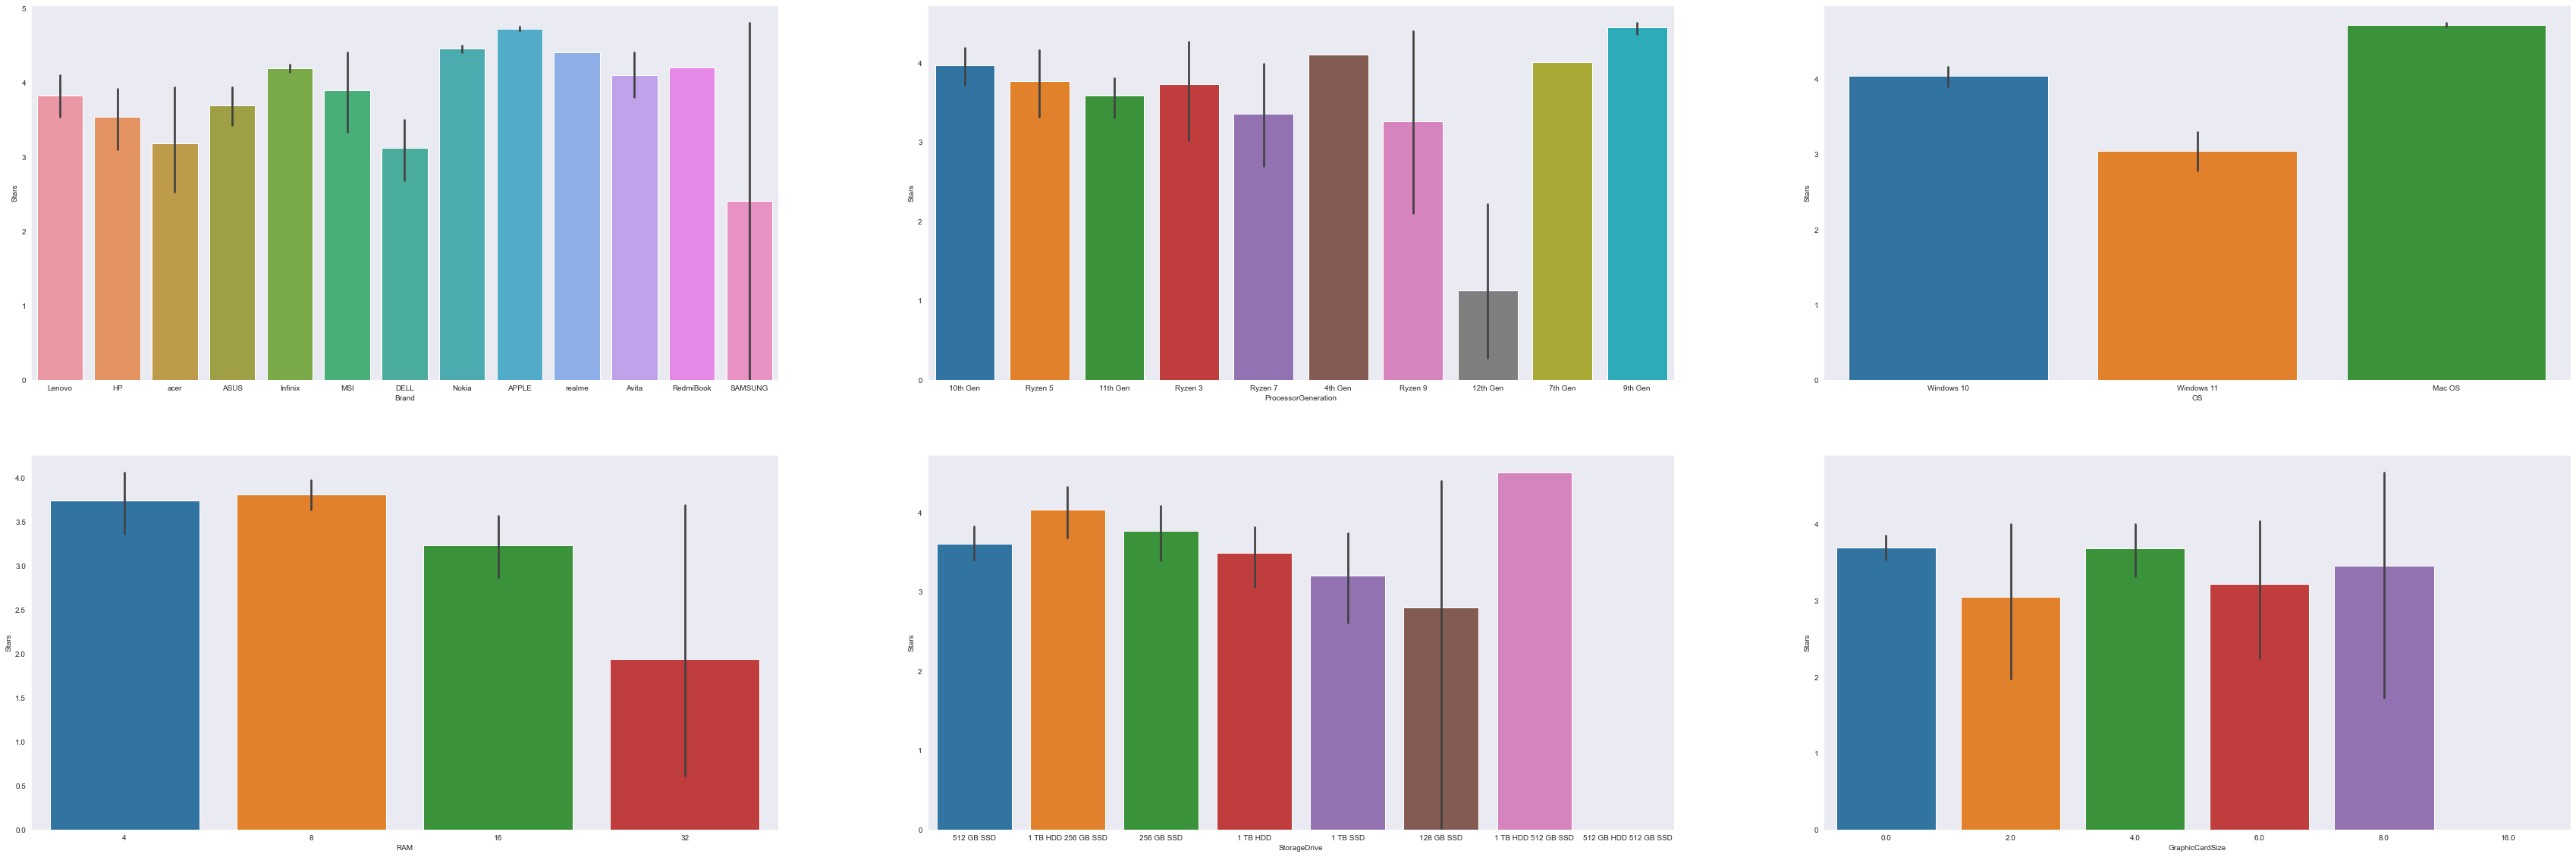

In [213]:
plt.figure(figsize=(60,20))
stars_factors=["Brand","ProcessorGeneration","OS","RAM","StorageDrive","GraphicCardSize"]
v=1
for i in stars_factors:
    plt.subplot(eval("23"+str(v)))
    ex = sbn.barplot(x=i,y="Stars",data=flipkart)
#     if (i == 'StorageDrive'):
#         ex.set_xticklabels(rotation = 45)
    v+=1

#### Please note that higher number of stars doesn't mean that everyone will find it best (as it might be possible that very few people gave ratings and that found that product best) so we also need to look at how many people has given those stars more the number of people with highest stars best the product will be.  
#### So we See That That Apple brand Has Highest Average Stars Of all.
#### But we also see that MacOs Operating system has highest ratings too so its quite inferable that since apple has highest ratings so thats why Apple Configuations with Os MacOs has High ratings. 

In [214]:
flipkart[flipkart["Brand"]=="APPLE"][["Brand","ProcessorGeneration","OS","RAM","StorageDrive","GraphicCardSize"]].mode()

,Brand,ProcessorGeneration,OS,RAM,StorageDrive,GraphicCardSize
0,APPLE,10th Gen,Mac OS,8,512 GB SSD,0.0


##### So This Was The EDA for Finding various Information from products Displayed On Flipkart. I Did EDA for Brands by majorly displayed Configurations on flipkart *(Intel core i5 11th Gen 8 Gb RAM 512 GB SSD)* but we took for >= 8 GB RAM >= 512 GB SSD|HDD as more than 8GB RAM will be obviously good and same for storage also, more than 512 GB also will be good and we took this only for 11th gen only. If needed like we considered > 8GB RAM, >512 GB SSD|HDD, we could have considered 10th Gen also along with 11th gen i.e (flipkart["gen"] == "10th gen | flipkart["gen"]=="11th gen") which could have given 10th gen also.

##### The Purpose of this Analysis was to determine which Configuration is Majorly displayed on flipkart and from those configurations pick out the top 3 brands and from those brands pick out the pocket friendly models having ratings >= 4 and then those models will be recommended to User for different purposes (Like Regular purpose Only or Gaming Only or Both).

##### This Same Analysis Could be Helpful For Flipkart To Determine On which Cnfiguration should they apply offers and what brands are in there so that offer could be appiled on them too. Offers related to payment gateway and cashback, not discount as the products fetched from majorly displayed configuration are already taken which are below 70k so offers could be if User opts for UPI,CC,DC or any other mode of payment or determining which mode is used a lot i.e if UPI is used more by customers then we can use this info to give cashback offers for UPI payement for making UPI payments for products under majorly displayed configuration. Well This will require seperate analysis like what mode is used most and then intergrate the offer on that payment gateway and integrate with majorly displayed configuration product list and so on.



#### Along with Majorly displayed Configurations on flipkart, we can similarly Analyse For Different Configurations Like:</i>

#### 1.Intel Core i5 10th Gen >=8GB RAM >=512 GB SSD|HDD
#### 2.Intel Core i7 10th Gen >=8GB RAM >=512 GB SSD|HDD
#### 3.Intel Core i7 11th Gen >=8GB RAM >=512 GB SSD|HDD
#### 4.Intel Core i9 10th Gen >=8GB RAM >=512 GB SSD|HDD
#### 5.Intel Core i9 11th Gen >=8GB RAM >=512 GB SSD|HDD
#### 6.AMD >=8GB RAM >=512 GB SSD|HDD

##### and So On and determine what configuration fits good for which purpose Gaming or regular Use and How is each better compared to other (Like i9 11th gen 16 GB RAM 1 TB SSD may be  better than i7 11th gen 16 GB RAM 1 TB SSD for Gaming or whatever based on cost or configurations depending how you consider the analysis). 


.
#### For Gaming we can study/analyse as below.

## Lets Check Which Configuration and Brand is Best For Gaming.

#### In Gaming Most of The People Buy Alienware Brand or Look for Configurations that are latest in market. Nowdays ASUS, acer, MSI and many more brands are Launching Gaming Models too. But it all depends.


#### For A Gaming Laptop The Processor Must be of i7 or More, RAM>8GB, Storage SSD|HDD >512 GB, Graphic Card >4 GB (Which is equal to saying GC >=6 GB NVIDIA) and most importantly the budget should be more than 80K mandatorily. Since Gaming laptops are usually expensive because of such configurations.

#### Lets See if we can Find the Laptops with this configuration.

In [215]:
Gaming = flipkart[(flipkart["ProcessorBrand"]=="Intel") & (flipkart["ProcessorGeneration"].str.startswith("1")) & ((flipkart["ProcessorName"]=="Core i7")|(flipkart["ProcessorName"]=="Core i9")) & (flipkart["RAM"]>8) & ((flipkart["SSD_GB"]>512) | (flipkart["HDD_GB"]>512)) & ((flipkart["GraphicCardSize"]>4) & (flipkart["GraphicCardBrand"]!="not mentioned"))]
Gaming

,Brand,ModelName,ProcessorBrand,ProcessorName,ProcessorGeneration,OS,RAM,HDD,SSD,StorageDrive,GraphicCardBrand,GraphicCardSize,Stars,Ratings,Reviews,Price,Discount(%),DiscountedPrice,SSD_GB,HDD_GB
58,MSI,MSI GF65 Thin Core i7 10th Gen - (16 GB/1 TB S...,Intel,Core i7,10th Gen,Windows 10,16,0,1 TB,1 TB SSD,NVIDIA,6.0,4.4,667.0,82.0,82990,33.0,55603.3,1024.0,0.0
190,DELL,DELL G15 Core i7 12th Gen - (16 GB/1 TB SSD/Wi...,Intel,Core i7,12th Gen,Windows 11,16,0,1 TB,1 TB SSD,NVIDIA,6.0,0.0,0.0,0.0,138990,21.0,109802.1,1024.0,0.0
201,acer,acer Predator Helios 300 Core i9 11th Gen - (3...,Intel,Core i9,11th Gen,Windows 11,32,0,1 TB,1 TB SSD,NVIDIA,8.0,0.0,0.0,0.0,169990,15.0,144491.5,1024.0,0.0
215,ASUS,ASUS ROG Strix SCAR 17 Core i9 12th Gen - (32 ...,Intel,Core i9,12th Gen,Windows 11,32,0,1 TB,1 TB SSD,NVIDIA,8.0,5.0,3.0,2.0,234990,18.0,192691.8,1024.0,0.0
286,MSI,MSI Pulse GL66 Core i7 11th Gen - (16 GB/1 TB ...,Intel,Core i7,11th Gen,Windows 10,16,0,1 TB,1 TB SSD,NVIDIA,6.0,4.6,99.0,20.0,114990,17.0,95441.7,1024.0,0.0
305,ASUS,ASUS ROG Strix SCAR 15 (2022) Core i9 12th Gen...,Intel,Core i9,12th Gen,Windows 11,32,0,1 TB,1 TB SSD,NVIDIA,16.0,0.0,0.0,0.0,301990,16.0,253671.6,1024.0,0.0
306,MSI,MSI Pulse GL66 Core i7 11th Gen - (16 GB/1 TB ...,Intel,Core i7,11th Gen,Windows 10,16,0,1 TB,1 TB SSD,NVIDIA,8.0,4.3,20.0,4.0,119990,33.0,80393.3,1024.0,0.0
316,ASUS,ASUS ROG Strix SCAR 15 (2022) Core i9 12th Gen...,Intel,Core i9,12th Gen,Windows 11,32,0,1 TB,1 TB SSD,NVIDIA,16.0,0.0,0.0,0.0,301990,16.0,253671.6,1024.0,0.0
320,MSI,MSI Pulse GL66 Core i7 11th Gen - (16 GB/1 TB ...,Intel,Core i7,11th Gen,Windows 10,16,0,1 TB,1 TB SSD,NVIDIA,8.0,4.3,20.0,4.0,119990,33.0,80393.3,1024.0,0.0
337,acer,acer Predator Helios 300 Core i7 11th Gen - (1...,Intel,Core i7,11th Gen,Windows 10,16,1 TB,512 GB,1 TB HDD 512 GB SSD,NVIDIA,6.0,4.5,368.0,59.0,112990,19.0,91521.9,512.0,1024.0


In [216]:
Gaming.shape

(14, 20)

#### So Above are the 14 Laptops For Gaming which Suits Best For gaming Criteria. This may be used for regular purpose also and infact would be better Option but for regular use only I won't suggest to spend this much money just for regular use.

#### But With Gaming Laptops options above, you can also work on Graphical Works Like Graphic Designing, Development, Game Developments. So To add More this is Better recommendations for Companies with profile of Software Engineers, Game Developers/Freelancers, Animations, Film Industries (VFX,VR Graphic work), etc but not for college students looking for Regular work only.

#### Since this is Gaming Then you will Need HDD>512 but more better if you use SSD only >512 or SSD and HDD both with either one of them having a Space of 1 TB. i.e if SSD is 512 or 128 or 256 Gb then HDD should be 1TB or vice versa and GC > 4.

#### Since gaming laptops are Expensive, we don't know what the minimum budget should be. Like it must be above 80K and atleast 100K but let's dig the answer from the data, let's see what this data says and that will be approximate minimum budget for Gaming.


# Note:
#### 1. For majorly displayed Configurations I did Analysis or EDA for 11th Gen only with RAM > 8GB also storage > 512GB SSD|HDD also but didn't take 10th Gen data. But For Gaming we will be taking 12th and 11th Gen data as well as RAM > 8GB which will give all RAM > 8GB and SSD >512GB i.e 1TB, 2TB till latest.

#### 2. And This Time I am taking laptops With Zero Stars too as Gaming laptops are Very Expensive, so there may be products which are too much costly and they are purchased very rarely i.e By Very Popular Professional Wealthly Gamers. So Let's Consider Them Too.

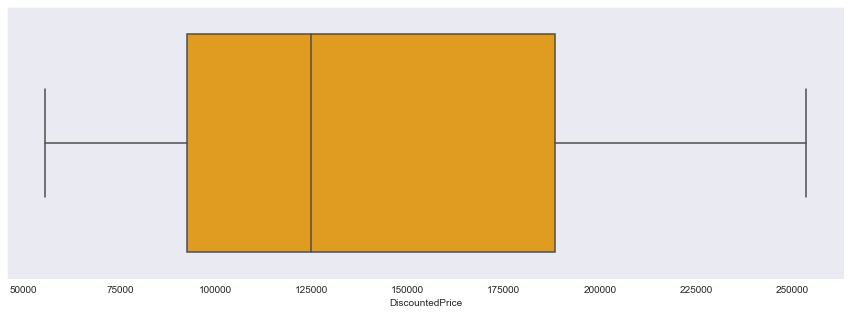

In [217]:
plt.figure(figsize=(15,5))
sbn.boxplot(data=Gaming,x="DiscountedPrice",color="orange")
plt.show()

#### As per above box your Min budget should be around 90K if you aspire for gaming Laptops.

#### Above we saw that, The Laptops fit best only for Gaming Purpose and the above table has i7 and i9 with 12th and 11th Gen Both i.e two processors as well as two generations. So Let's narrow the gaming recommendation by i7 and i9 for 12th and 11th gen seperately i.e Gaming Recommendation if you prefer i7 12th Gen, Gaming Recommendation if you prefer i9 12th gen, Gaming Recommendation if you prefer i7 11th gen and Gaming Recommendation if you prefer i9 11th gen. Anyways the above table/dataset is enough and no need for further analysis as such as user can select as per his/her wish but fractioned recommendation will be more accurate. You Can View all Gaming Laptops i.e i7 and i9 for 12th and 11th both above or view the table below if you prefer to look only for i7 or i9 with 12th or 11th Gen. So now Let's Seperate i7 and i9 with 12th and 11th Gen and analyse the same like we did earlier.

#### Let's see count for Brand, ProcessorsName, Gen, RAM, StorageDrive, GC Size, GC Brand. We Did Take For Core i7 and i9 but now let's check how many brands with i7 and i9 seperately. Since Both Processors are good for gaming.

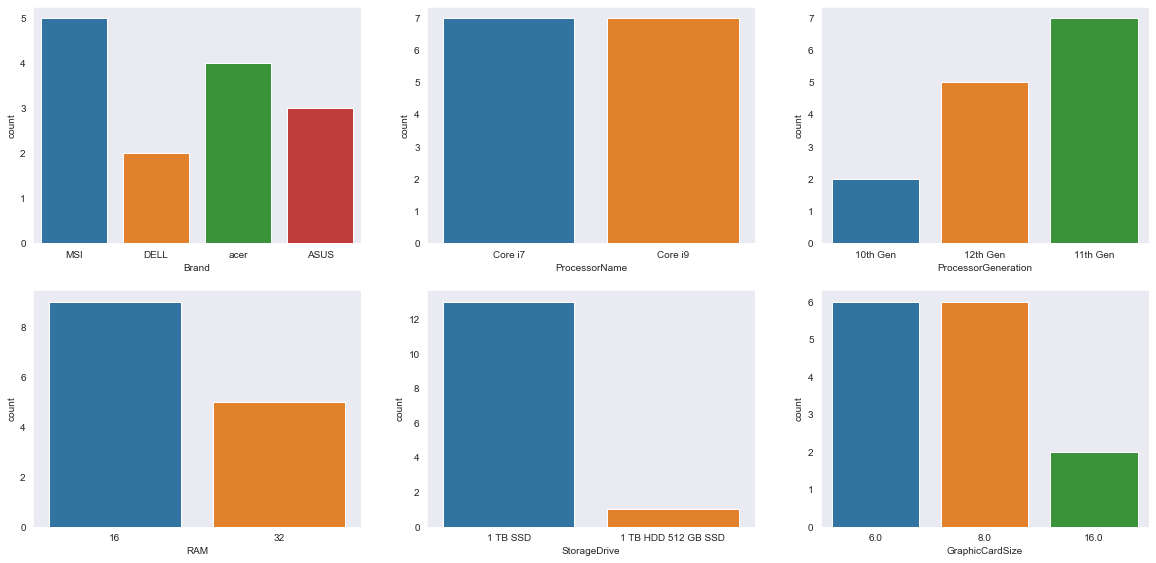

In [220]:
plt.figure(figsize=(20,20))
plt.subplot(431)
sbn.countplot(x="Brand",data=Gaming)
plt.subplot(432)
sbn.countplot(x="ProcessorName",data=Gaming)
plt.subplot(433)
sbn.countplot(x="ProcessorGeneration",data=Gaming)
plt.subplot(434)
sbn.countplot(x="RAM",data=Gaming)
plt.subplot(435)
sbn.countplot(x="StorageDrive",data=Gaming)
plt.subplot(436)
sbn.countplot(x="GraphicCardSize",data=Gaming)
plt.show()

#### From This Graph We Can Conclude That Most Of The Gaming laptops in List Have Intel 11th gen with same number of i7 and i9 processor, 16 GB RAM, 1TB SSD, 6 as well as 8 GB NVIDIA GC but with this info combined we can't say for sure which brand has this all filters maximum any brand can have this filters and In That MSI And ACER have 5 and 4 Models respectively while DELL and ASUS has 2 and 3 respective Model. 

#### But Now Let's Check and See Via Different Processors i.e let's See How Many Brands Have i7 10th Gen >=16 GB RAM >=1 TB SSD and >=6 GB GC.

#### And After Analysing i7 Same Analysis for i9 we will do as well, so that we can show seperate table for gaming i7 and i9 Laptops.

#### Let's See.


# Note:
#### Here we see that 6 and 8 GB GC both has highest Counts, so we can take GC >= 8 but here we will take 6 also because for Gaming laptop the requirement for GC size is min 6 GB so no harm in taking 6 also and even if we take >= 8 or > 6 GB no issues. If 8 GB was minimum requirement of GC then we wouldn't have taken 6 no matter if it had high count.
#### Now we take 6 GB GC as the min requirement for gaming.

In [227]:
Gaming[(Gaming["ProcessorName"]=="Core i7") & (Gaming["ProcessorGeneration"]=="10th Gen") & (Gaming["RAM"]>=16.0) & (Gaming["SSD_GB"]==1024) & (Gaming["GraphicCardSize"]==6)]

,Brand,ModelName,ProcessorBrand,ProcessorName,ProcessorGeneration,OS,RAM,HDD,SSD,StorageDrive,GraphicCardBrand,GraphicCardSize,Stars,Ratings,Reviews,Price,Discount(%),DiscountedPrice,SSD_GB,HDD_GB
58,MSI,MSI GF65 Thin Core i7 10th Gen - (16 GB/1 TB S...,Intel,Core i7,10th Gen,Windows 10,16,0,1 TB,1 TB SSD,NVIDIA,6.0,4.4,667.0,82.0,82990,33.0,55603.3,1024.0,0.0


#### So Above are the laptops if you prefer i7 10th Gen 16 GB RAM 1 TB SSD and GC of size 6. We know that 6 GB GC is Minimum so we have taken 6 GB also.

#### Let's Check For > 16 GB RAM, > 512 GB SSD and HDD and >= 6 GB GC for i7 Processors. But as we did for Majorly displayed configurations i.e plot price distribution first to get idea of average price and then show Model table (i.e Recommendation for that category configuration). So Same we will do for i7 and i9 seperately.

# Note:
#### Taking 6 GB GC because it's the minimum requirement.

#### Now Let's See What Models are there in i7 which is also our recommendation if we prefer Gaming laptop with i7.

In [228]:
i7_Gaming_12th=Gaming[(Gaming["ProcessorName"]=="Core i7") & (Gaming["ProcessorGeneration"]=="12th Gen") & (Gaming["RAM"]>=16) & ((Gaming["SSD_GB"]>=1024)|(Gaming["HDD_GB"]>=1024)) & (Gaming["GraphicCardSize"]>=6)]
i7_Gaming_12th

,Brand,ModelName,ProcessorBrand,ProcessorName,ProcessorGeneration,OS,RAM,HDD,SSD,StorageDrive,GraphicCardBrand,GraphicCardSize,Stars,Ratings,Reviews,Price,Discount(%),DiscountedPrice,SSD_GB,HDD_GB
190,DELL,DELL G15 Core i7 12th Gen - (16 GB/1 TB SSD/Wi...,Intel,Core i7,12th Gen,Windows 11,16,0,1 TB,1 TB SSD,NVIDIA,6.0,0.0,0.0,0.0,138990,21.0,109802.1,1024.0,0.0
453,MSI,MSI Stealth GS66 Core i7 12th Gen - (32 GB/1 T...,Intel,Core i7,12th Gen,Windows 11,32,0,1 TB,1 TB SSD,NVIDIA,8.0,0.0,0.0,0.0,279990,10.0,251991.0,1024.0,0.0


#### So The Models Above Suit Best For Gaming laptops with i7 12th gen to say precisely.

#### Laptops with i7 Processor and 12th Gen have a Average Price of around 175K. To have a gaming laptop with i7 Processor 12th Gen, thus budget should be more than 100K as Gaming Laptops are really Expensive and to be more accurate they are above 80K generally and yes they are super efficient and faster than any computers in processing.

#### Now let's See For i9 12th Gen. So let's Check the price distribution.

In [230]:
i9_Gaming_12th = Gaming[(Gaming["ProcessorName"]=="Core i9") & (Gaming["ProcessorGeneration"]=="12th Gen") & (Gaming["RAM"]>=16) & ((Gaming["SSD_GB"]>=1024)|(Gaming["HDD_GB"]>=1024)) & (Gaming["GraphicCardSize"]>=6)]
i9_Gaming_12th

,Brand,ModelName,ProcessorBrand,ProcessorName,ProcessorGeneration,OS,RAM,HDD,SSD,StorageDrive,GraphicCardBrand,GraphicCardSize,Stars,Ratings,Reviews,Price,Discount(%),DiscountedPrice,SSD_GB,HDD_GB
215,ASUS,ASUS ROG Strix SCAR 17 Core i9 12th Gen - (32 ...,Intel,Core i9,12th Gen,Windows 11,32,0,1 TB,1 TB SSD,NVIDIA,8.0,5.0,3.0,2.0,234990,18.0,192691.8,1024.0,0.0
305,ASUS,ASUS ROG Strix SCAR 15 (2022) Core i9 12th Gen...,Intel,Core i9,12th Gen,Windows 11,32,0,1 TB,1 TB SSD,NVIDIA,16.0,0.0,0.0,0.0,301990,16.0,253671.6,1024.0,0.0
316,ASUS,ASUS ROG Strix SCAR 15 (2022) Core i9 12th Gen...,Intel,Core i9,12th Gen,Windows 11,32,0,1 TB,1 TB SSD,NVIDIA,16.0,0.0,0.0,0.0,301990,16.0,253671.6,1024.0,0.0


#### Looking Over the discounted cost's of both which more than 190K . So If you Want i9 12th Gen Gaming Laptop then you budget should be atleast 190K. 
#### We can see that all the laptops belongs to ASUS brand and also we can see the direct effect of GC on Price, means 8 GC one has lesser price and laptops which has 16 GB GC has increment of almost 70k in price and that's why the Stars are zero as no one has bought or rare purchases and that too no one is rating it.

#### Your minimum budget should be 190K To Purchase laptops with i9 12th Gen which is latest as of now.

#### So Finally Recommendation for i9 12th Gen laptops is the above table.

In [231]:
i7_Gaming_11th = Gaming[(Gaming["ProcessorName"]=="Core i7") & (Gaming["ProcessorGeneration"]=="11th Gen") & (Gaming["RAM"]>=16) & ((Gaming["SSD_GB"]>=1024)|(Gaming["HDD_GB"]>=1024)) & (Gaming["GraphicCardSize"]>=6)]
i7_Gaming_11th

,Brand,ModelName,ProcessorBrand,ProcessorName,ProcessorGeneration,OS,RAM,HDD,SSD,StorageDrive,GraphicCardBrand,GraphicCardSize,Stars,Ratings,Reviews,Price,Discount(%),DiscountedPrice,SSD_GB,HDD_GB
286,MSI,MSI Pulse GL66 Core i7 11th Gen - (16 GB/1 TB ...,Intel,Core i7,11th Gen,Windows 10,16,0,1 TB,1 TB SSD,NVIDIA,6.0,4.6,99.0,20.0,114990,17.0,95441.7,1024.0,0.0
306,MSI,MSI Pulse GL66 Core i7 11th Gen - (16 GB/1 TB ...,Intel,Core i7,11th Gen,Windows 10,16,0,1 TB,1 TB SSD,NVIDIA,8.0,4.3,20.0,4.0,119990,33.0,80393.3,1024.0,0.0
320,MSI,MSI Pulse GL66 Core i7 11th Gen - (16 GB/1 TB ...,Intel,Core i7,11th Gen,Windows 10,16,0,1 TB,1 TB SSD,NVIDIA,8.0,4.3,20.0,4.0,119990,33.0,80393.3,1024.0,0.0
337,acer,acer Predator Helios 300 Core i7 11th Gen - (1...,Intel,Core i7,11th Gen,Windows 10,16,1 TB,512 GB,1 TB HDD 512 GB SSD,NVIDIA,6.0,4.5,368.0,59.0,112990,19.0,91521.9,512.0,1024.0


#### So Let's Check The Price Distribution Of i7 Laptops for this.

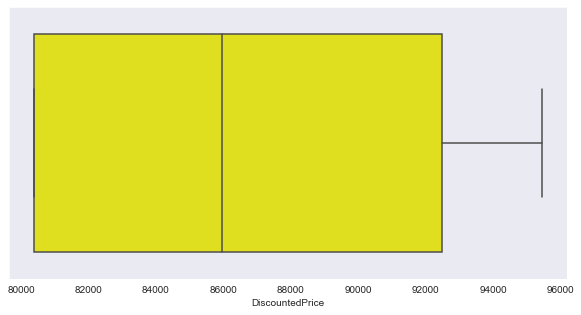

In [234]:
plt.figure(figsize = (10,5))
sbn.boxplot(data = i7_Gaming_11th, x = "DiscountedPrice", color = "yellow")
plt.show()

#### As we can see Laptops with i7 Processor and 11th Gen have a Average Price of around 85K.
#### It may be that i7 12th Gen 16 GB RAM 1TB SSD|HDD 6GB GC have eqivalent or more better performance than i7 11th Gen 16 GB RAM 1TB SSD|HDD 8GB GC. For i7 12th gen laptops the average price is 100 K or say min 100 K should be your budget and above laptop is 85 K so doesn't make much difference to go for 12th or 11th Gen (if 15K - 20K price is adjustable), Just that 12th Gen might have little bit better performance than 11th Gen.

#### Lets Look For i9 11th Gen now.

In [235]:
i9_Gaming_11th = Gaming[(Gaming["ProcessorName"]=="Core i9") & (Gaming["ProcessorGeneration"]=="11th Gen") & (Gaming["RAM"]>=16) & ((Gaming["SSD_GB"]>=1024)|(Gaming["HDD_GB"]>=1024)) & (Gaming["GraphicCardSize"]>=6)]
i9_Gaming_11th

,Brand,ModelName,ProcessorBrand,ProcessorName,ProcessorGeneration,OS,RAM,HDD,SSD,StorageDrive,GraphicCardBrand,GraphicCardSize,Stars,Ratings,Reviews,Price,Discount(%),DiscountedPrice,SSD_GB,HDD_GB
201,acer,acer Predator Helios 300 Core i9 11th Gen - (3...,Intel,Core i9,11th Gen,Windows 11,32,0,1 TB,1 TB SSD,NVIDIA,8.0,0.0,0.0,0.0,169990,15.0,144491.5,1024.0,0.0
347,acer,acer Predator Helios 300 Core i9 11th Gen - (1...,Intel,Core i9,11th Gen,Windows 11,16,0,1 TB,1 TB SSD,NVIDIA,6.0,0.0,0.0,0.0,144990,14.0,124691.4,1024.0,0.0
374,acer,acer Predator Helios 300 Core i9 11th Gen - (1...,Intel,Core i9,11th Gen,Windows 11,16,0,1 TB,1 TB SSD,NVIDIA,6.0,0.0,0.0,0.0,144990,14.0,124691.4,1024.0,0.0


#### Well for i9 and 11th Gen laptop the average price is 135K which is higher than that of for i7 11th Gen, i7 12th Gen gaming laptop's average price. All the laptops for i9 and 11th Gen belongs to acer brand.  


## SO TO CONCLUDE,FOR GAMING LAPTOPS THE ANALYSIS IS OVER AND ABOVE ARE THE RECOMMENDATIONS FOR GAMING LAPTOPS. FOR REGULAR USE THIS PRICES ARE EXPENSIVE AND NO NEED TO SPEND THIS MUCH.

## Gaming dataset has both i7 and i9, User can Look here to get both configuration laptops and choose. But To Seperate Then:
#### look over i7_gaming_12th if you prefer i7 and 12th gen
#### look over i7_gaming_11th if you prefer i7 and 11th gen
#### look over i9_gaming_12th if you prefer i9 and 12th gen
#### look over i9_gaming_11th if you prefer i9 and 11th gen.


# Note:
#### Since You have decided to buy gaming Laptop, It is mandatory to know what configurations gaming Laptop has before buying aa well as how much price is required. For eg. You Must Know that If you have to Look gaming laptop then you should look over i7or i9 12th or 11th Gen and RAM > 8GB, Storage > 512 GB SSD or HDD or SSD and HDD both and GC > 4 GB or say GC>= 6 GB NVIDIA and price budget should be atleast 100K. These should be your configuration if you want gaming laptop nothing below this one (i.e Core i5 10th or 11th gen Ram<16 GB Storage <1 TB SSD or HDD) otherwise that configuration is not recommended for Gaming strictly and sugessted only for regular use Only as shown for recommendation for regular use.

#### Let's See Which laptop and its Brand is Most Expensive and Highest of all on flipkart

In [236]:
flipkart[flipkart["DiscountedPrice"] == flipkart["DiscountedPrice"].max()]

,Brand,ModelName,ProcessorBrand,ProcessorName,ProcessorGeneration,OS,RAM,HDD,SSD,StorageDrive,GraphicCardBrand,GraphicCardSize,Stars,Ratings,Reviews,Price,Discount(%),DiscountedPrice,SSD_GB,HDD_GB
305,ASUS,ASUS ROG Strix SCAR 15 (2022) Core i9 12th Gen...,Intel,Core i9,12th Gen,Windows 11,32,0,1 TB,1 TB SSD,NVIDIA,16.0,0.0,0.0,0.0,301990,16.0,253671.6,1024.0,0.0
316,ASUS,ASUS ROG Strix SCAR 15 (2022) Core i9 12th Gen...,Intel,Core i9,12th Gen,Windows 11,32,0,1 TB,1 TB SSD,NVIDIA,16.0,0.0,0.0,0.0,301990,16.0,253671.6,1024.0,0.0


#### The Above Model has The Highest Price And Fits Best For Gaming Category. So If You Prefer A laptop With Good Latest configuration For Gaming Only and Price is not your consideration but configurations are then This is one of the Best Fit For Gaming and for the work which requires Gaming configuration. But Difference is this is Very expensive. So if you are a popular well big shot Entity,You can opt for this and this also surpasses the suggestion given aboove for gaming(i.e i7 and i9 one) in processor, Storage, RAM.

#### But there is No stars for this, It may be that this laptop is Very expensive, No One has Bought it and that's why no ratings and reviews.

#### Lets See which Laptop and its Brand is most lowest and cheapest of all

In [237]:
flipkart[flipkart["DiscountedPrice"]==flipkart["DiscountedPrice"].min()]

,Brand,ModelName,ProcessorBrand,ProcessorName,ProcessorGeneration,OS,RAM,HDD,SSD,StorageDrive,GraphicCardBrand,GraphicCardSize,Stars,Ratings,Reviews,Price,Discount(%),DiscountedPrice,SSD_GB,HDD_GB
400,Lenovo,Lenovo IdeaPad 3 Chromebook Celeron Dual Core ...,Intel,Celero,NaN,Windows 10,4,0,0,NaN,not mentioned,0.0,3.5,658.0,76.0,15990,35.0,10393.5,0.0,0.0
419,Lenovo,Lenovo IdeaPad 3 Chromebook Celeron Dual Core ...,Intel,Celero,NaN,Windows 10,4,0,0,NaN,not mentioned,0.0,3.5,658.0,76.0,15990,35.0,10393.5,0.0,0.0


#### The Above Brand and model is most cheapest but having poor stars and it doesn't contain HDD or SSD, It may contain different storage which is internal and different from HDD and SSD. So if you have something to go very low on price this may be you option.

#### Lets See which Laptop Has Highest Stars on flipkart

In [239]:
flipkart[flipkart["Stars"]==flipkart["Stars"].max()]

,Brand,ModelName,ProcessorBrand,ProcessorName,ProcessorGeneration,OS,RAM,HDD,SSD,StorageDrive,GraphicCardBrand,GraphicCardSize,Stars,Ratings,Reviews,Price,Discount(%),DiscountedPrice,SSD_GB,HDD_GB
153,ASUS,ASUS ZenBook Core i5 11th Gen - (8 GB/512 GB S...,Intel,Core i5,11th Gen,Windows 11,8,0,512 GB,512 GB SSD,not mentioned,0.0,5.0,3.0,0.0,69990,19.0,56691.9,512.0,0.0
155,Lenovo,Lenovo IdeaPad Core i5 11th Gen - (16 GB/512 G...,Intel,Core i5,11th Gen,Windows 11,16,0,512 GB,512 GB SSD,not mentioned,0.0,5.0,3.0,0.0,62990,35.0,40943.5,512.0,0.0
169,Lenovo,Lenovo IdeaPad Gaming 3 Ryzen 5 Hexa Core 5600...,AMD,Ryzen 5Core,Ryzen 5,Windows 11,8,0,512 GB,512 GB SSD,NVIDIA,4.0,5.0,3.0,1.0,69990,32.0,47593.2,512.0,0.0
215,ASUS,ASUS ROG Strix SCAR 17 Core i9 12th Gen - (32 ...,Intel,Core i9,12th Gen,Windows 11,32,0,1 TB,1 TB SSD,NVIDIA,8.0,5.0,3.0,2.0,234990,18.0,192691.8,1024.0,0.0
234,ASUS,ASUS ZenBook Core i5 11th Gen - (8 GB/512 GB S...,Intel,Core i5,11th Gen,Windows 11,8,0,512 GB,512 GB SSD,not mentioned,0.0,5.0,3.0,0.0,69990,19.0,56691.9,512.0,0.0
312,HP,HP 15s Core i3 11th Gen - (8 GB/512 GB SSD/Win...,Intel,Core i3,11th Gen,Windows 11,8,0,512 GB,512 GB SSD,not mentioned,0.0,5.0,5.0,0.0,42490,17.0,35266.7,512.0,0.0
385,HP,HP 15s Core i3 11th Gen - (8 GB/512 GB SSD/Win...,Intel,Core i3,11th Gen,Windows 11,8,0,512 GB,512 GB SSD,not mentioned,0.0,5.0,5.0,0.0,42490,17.0,35266.7,512.0,0.0
441,ASUS,ASUS Core i5 10th Gen - (8 GB/1 TB HDD/256 GB ...,Intel,Core i5,10th Gen,Windows 10,8,1 TB,256 GB,1 TB HDD 256 GB SSD,not mentioned,2.0,5.0,2.0,1.0,55990,17.0,46471.7,256.0,1024.0


#### Lets See The Price Distribution Of Laptops which has Max ratings

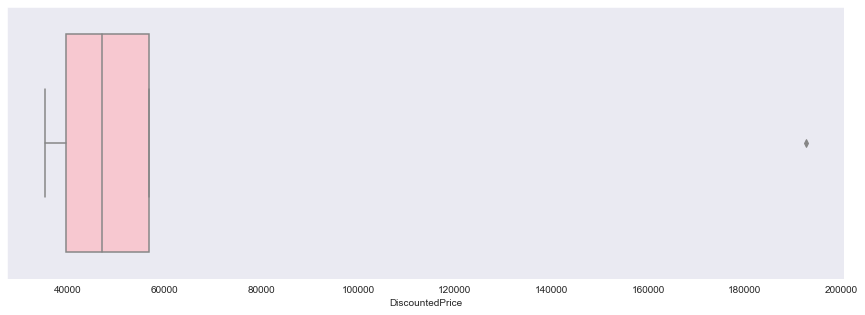

In [240]:
plt.figure(figsize=(15,5))
sbn.boxplot(data = flipkart[flipkart["Stars"]==flipkart["Stars"].max()],x="DiscountedPrice",color="pink")
plt.show()

#### Laptops With Highest Stars i.e 5, Have median price of around 50K and Lies in the range of 40K-60K. So laptops With Highest Stars have lower number of ratings and reviews as well, thus please note that maybe because only few people rated those laptops resulting full/ maximum stars. 

#### Also we can see that most of the laptops with maximum stars are pocket friendly except one laptop here, so maybe because no one tends to buy very expensive laptop specially online that's why we can see only lower priced laptops having full stars, doesn't mean that higher priced laptops are not good. 

#### Laptops with Lowest Stars i.e 0

In [241]:
flipkart[flipkart["Stars"]==flipkart["Stars"].min()]

,Brand,ModelName,ProcessorBrand,ProcessorName,ProcessorGeneration,OS,RAM,HDD,SSD,StorageDrive,GraphicCardBrand,GraphicCardSize,Stars,Ratings,Reviews,Price,Discount(%),DiscountedPrice,SSD_GB,HDD_GB
4,acer,acer Aspire 3 Core i3 11th Gen - (8 GB/512 GB ...,Intel,Core i3,11th Gen,Windows 11,8,0,512 GB,512 GB SSD,not mentioned,0.0,0.0,0.0,0.0,38990,30.0,27293.00,512.0,0.0
18,DELL,DELL Vostro Core i3 11th Gen - (4 GB/1 TB HDD/...,Intel,Core i3,11th Gen,Windows 11,4,1 TB,256 GB,1 TB HDD 256 GB SSD,not mentioned,0.0,0.0,0.0,0.0,35999,36.0,23039.36,256.0,1024.0
28,ASUS,ASUS VivoBook 15 (2021) Core i5 10th Gen - (8 ...,Intel,Core i5,10th Gen,Windows 11,8,0,512 GB,512 GB SSD,not mentioned,0.0,0.0,0.0,0.0,47990,26.0,35512.60,512.0,0.0
49,ASUS,ASUS VivoBook 15 (2021) Core i3 10th Gen - (8 ...,Intel,Core i3,10th Gen,Windows 11,8,0,512 GB,512 GB SSD,not mentioned,0.0,0.0,0.0,0.0,38990,23.0,30022.30,512.0,0.0
103,ASUS,ASUS VivoBook Ultra K15 OLED Core i3 11th Gen ...,Intel,Core i3,11th Gen,Windows 11,8,1 TB,256 GB,1 TB HDD 256 GB SSD,not mentioned,0.0,0.0,0.0,0.0,50990,19.0,41301.90,256.0,1024.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442,Lenovo,Lenovo Yoga 6 Ryzen 5 Hexa Core 5500U - (16 GB...,AMD,Ryzen 5Core,Ryzen 5,Windows 10,16,0,512 GB,512 GB SSD,not mentioned,0.0,0.0,0.0,0.0,75990,27.0,55472.70,512.0,0.0
443,ASUS,ASUS Zenbook 14 OLED (2022) Intel EVO Core i5 ...,Intel,Core i5,12th Gen,Windows 11,16,0,512 GB,512 GB SSD,not mentioned,0.0,0.0,0.0,0.0,89990,18.0,73791.80,512.0,0.0
447,DELL,DELL Vostro Core i3 11th Gen - (4 GB/1 TB HDD/...,Intel,Core i3,11th Gen,Windows 11,4,1 TB,256 GB,1 TB HDD 256 GB SSD,not mentioned,0.0,0.0,0.0,0.0,44090,23.0,33949.30,256.0,1024.0
449,MSI,MSI Modern 14 Ryzen 5 Hexa Core Ryzen 5 5500U ...,AMD,Ryzen 5Core,Ryzen 5,Windows 10,8,0,256 GB,256 GB SSD,not mentioned,0.0,0.0,0.0,0.0,49990,26.0,36992.60,256.0,0.0


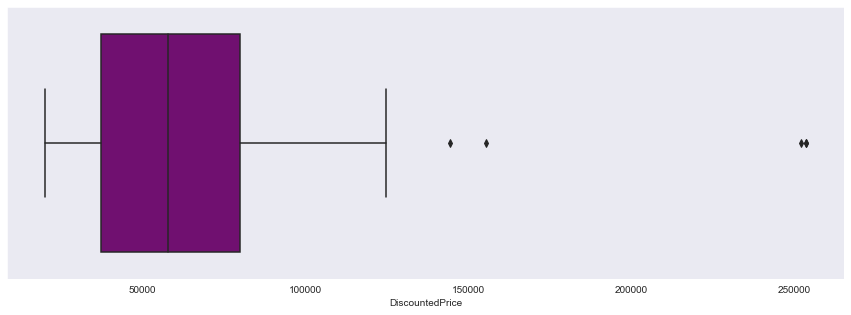

In [242]:
plt.figure(figsize=(15,5))
sbn.boxplot(data=flipkart[flipkart["Stars"]==flipkart["Stars"].min()],x="DiscountedPrice",color="purple")
plt.show()

#### We See that laptops with 0 Stars have median price around 60 K and most of it lies in range of 30K to 80K and also there are some outliers and this means that There may be very expensive laptops which mostly people don't buy and that's why they are rated 0, the laptops may be new and latest in market and no has yet purchased or the laptops might be having bad impression and no one tends to go for those laptops. But This range Can have laptops which are pocket friendly.

#### So We can Do Analysis depending on various facts and draw variety of conclusions. But the above one were all extra High Low ratings, Cost analysis, But the one which we did i.e Check which was the most displayed configuration on flipkart and from them pick top 3 Brands and from those brands, Which models are Affordable, Pocket friendly and have ratings >= 4.

##### Finally lets look at pairplot of numerical columns

In [248]:
dn = flipkart[['Stars','Ratings','DiscountedPrice','RAM','GraphicCardSize','SSD_GB','HDD_GB']]

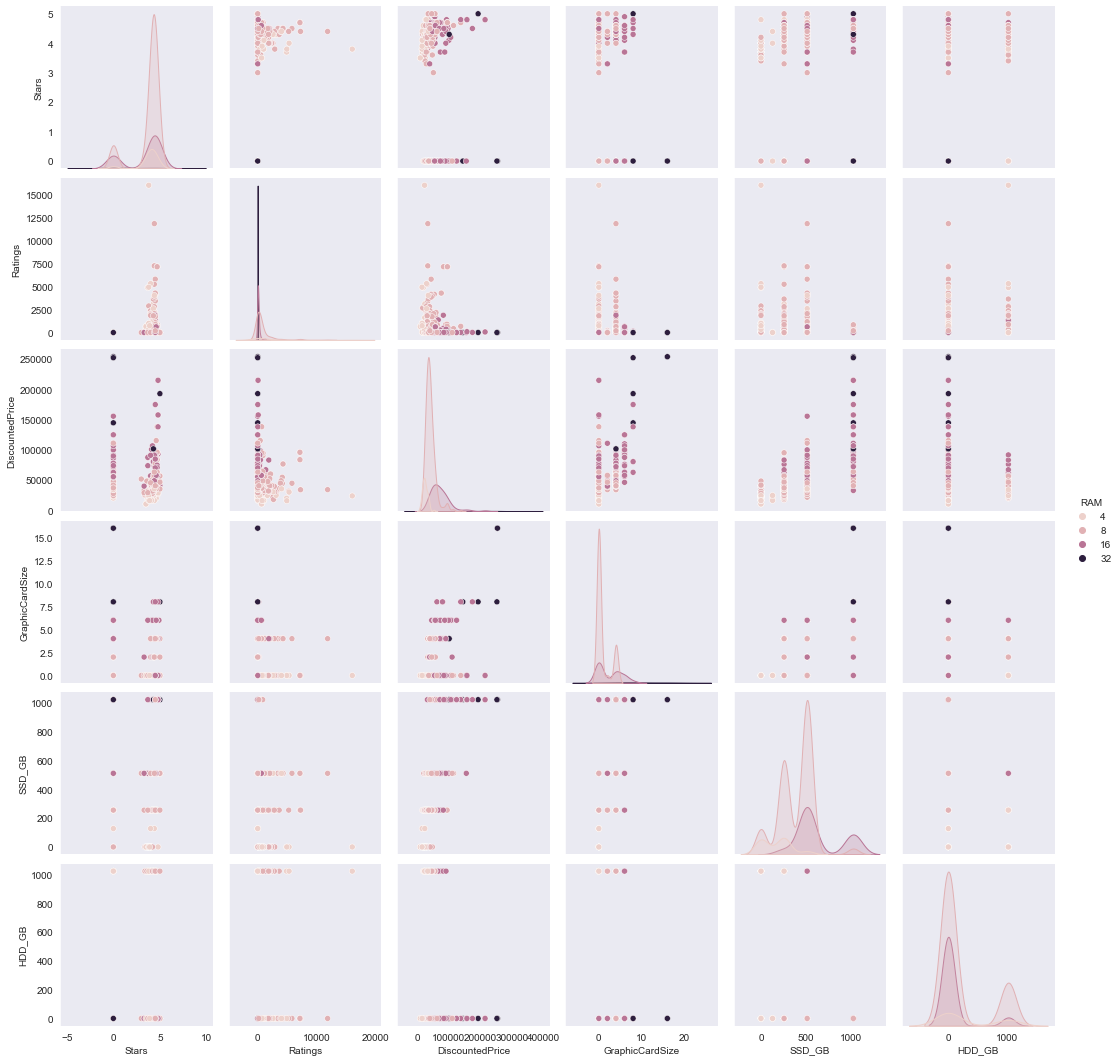

In [251]:
# plt.figure(figsize = (50,50))
sbn.pairplot(dn, kind = 'scatter', hue = 'RAM')
plt.show()